In [1]:
#Split location-only results by MA and cone angle.

import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
#open OMNI *average* CSVs
list_all = []

path = "/Users/apx059/Documents/2001and2003/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
om_csvs = []

for element in list_all:
    if '.csv' and 'OMNI' in element:
        om_csvs.append(element)
        
om_dfs = []

for element in om_csvs:
    om = pd.read_csv(element)
    om_dfs.append(om)
    
omni_all = pd.concat(om_dfs)
omni_all['datetime'] = pd.to_datetime(omni_all['datetime'],format='mixed')

omni_all = omni_all.set_index('datetime')

for element in om_dfs:
    element['datetime'] = pd.to_datetime(element['datetime'])
    element = element.set_index('datetime', inplace = True)

XMA_all = XMA_finder(omni_all)

/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/2451725765.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  element['datetime'] = pd.to_datetime(element['datetime'])
/var/folders/1k/d29q1t

In [ ]:
XMA_all = 10

In [3]:
##load Cluster CSVs

list_all = []

path = "/Users/apx059/Documents/2001and2003/**"

for path in glob.glob(path, recursive=True):
    list_all.append(path)
    
#list with only files, not folders
cl_file_list = []

for element in list_all:
    if '.csv' in element:
        if not 'OMNI' in element:
            cl_file_list.append(element)

cl_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace = True)
    cl_dfs.append(df)

/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipykernel_3879/1934760380.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/1k/d29q1thx35102vp3n2vrwt9r0000gq/T/ipy

In [4]:
#make new dataframes split by 1. cone angle and 2. MA
cl_all = pd.concat(cl_dfs)

df_radial = cl_all.loc[(cl_all['cone angle'] < 30) & (cl_all['GIPM X'].notnull())]
df_spiral = cl_all.loc[(cl_all['cone angle'] > 30) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X'].notnull())]
df_perpendicular = cl_all.loc[(cl_all['cone angle'] > 60) & (cl_all['GIPM X'].notnull())]

In [5]:
#now break up by MA. MA ranges <5, 5-10, 10-15, 15-20, >20

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

#reference all X, Y, and Z

x_locs_rad = df_rad_lowZ['GIPM X'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [6]:
#now break up by MA, lowZ. MA ranges <5, 5-10, 10-15, >15

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]
df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

#spiral 

df_spir_less5 = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] < 5)]
df_spir_5_10 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 5) & df_spir_lowZ['M_A'] < 10)]
df_spir_10_15 = df_spir_lowZ.loc[((df_spir_lowZ['M_A'] >= 10) & df_spir_lowZ['M_A'] < 15)]
df_spir_15more = df_spir_lowZ.loc[(df_spir_lowZ['M_A'] >= 15)]

#perpendicular

df_perp_less5 = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] < 5)]
df_perp_5_10 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 5) & (df_perp_lowZ['M_A'] < 10))]
df_perp_10_15 = df_perp_lowZ.loc[((df_perp_lowZ['M_A'] >= 10) & (df_perp_lowZ['M_A'] < 15))]
df_perp_15more = df_perp_lowZ.loc[(df_perp_lowZ['M_A'] >= 15)]

#break up into radial, 
#reference all X, Y, and Z

df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]

x_locs_rad = df_rad_lowZ['GIPM X'].to_numpy()
y_locs_rad = df_rad_lowZ['GIPM Y'].to_numpy()
z_locs_rad = df_rad_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_rad, xedg, yedg = np.histogram2d(x_locs_rad, y_locs_rad, bins=[x_bin_edges, y_bin_edges])
HistXY_rad = HistXY_rad.T

z_bin_edges = range(-30,30)
HistXZ_rad, xedg, zedg = np.histogram2d(x_locs_rad, z_locs_rad, bins=[x_bin_edges, z_bin_edges])
HistXZ_rad = HistXZ_rad.T

HistXY_rad[HistXY_rad == 0] = np.nan
HistXZ_rad[HistXZ_rad == 0] = np.nan

#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan

################perpendicular 
#reference all X, Y, and Z

df_perp_lowZ = df_perpendicular.loc[(df_perpendicular['GIPM Z'] < 5) & (df_perpendicular['GIPM Z'] > -5)]

x_locs_perp = df_perp_lowZ['GIPM X'].to_numpy()
y_locs_perp = df_perp_lowZ['GIPM Y'].to_numpy()
z_locs_perp = df_perp_lowZ['GIPM Z'].to_numpy()


##use numpy histogram to get actual bin numbers
x_bin_edges = range(30)
y_bin_edges = range(-30,30)
HistXY_perp, xedg, yedg = np.histogram2d(x_locs_perp, y_locs_perp, bins=[x_bin_edges, y_bin_edges])
HistXY_perp = HistXY_perp.T

z_bin_edges = range(-30,30)
HistXZ_perp, xedg, zedg = np.histogram2d(x_locs_perp, z_locs_perp, bins=[x_bin_edges, z_bin_edges])
HistXZ_perp = HistXZ_perp.T

HistXY_perp[HistXY_perp == 0] = np.nan
HistXZ_perp[HistXZ_perp == 0] = np.nan

In [7]:
#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#########RADIAL######

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15 MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y'].to_numpy()

HistXY_rad_10_15, xedg, zedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

#########SPIRAL######

###BELOW 7MA

x_locs_spir_less5 = df_spir_less5['GIPM X'].to_numpy()
y_locs_spir_less5 = df_spir_less5['GIPM Y'].to_numpy()

HistXY_spir_less5, xedg, yedg = np.histogram2d(x_locs_spir_less5, y_locs_spir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_less5 = HistXY_spir_less5.T

###5-10 MA

x_locs_spir_5_10 = df_spir_5_10['GIPM X'].to_numpy()
y_locs_spir_5_10 = df_spir_5_10['GIPM Y'].to_numpy()

HistXY_spir_5_10, xedg, zedg = np.histogram2d(x_locs_spir_5_10, y_locs_spir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_5_10 = HistXY_spir_5_10.T

###10-15 MA

x_locs_spir_10_15 = df_spir_10_15['GIPM X'].to_numpy()
y_locs_spir_10_15 = df_spir_10_15['GIPM Y'].to_numpy()

HistXY_spir_10_15, xedg, zedg = np.histogram2d(x_locs_spir_10_15, y_locs_spir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_10_15 = HistXY_spir_10_15.T

###OVER 15MA
x_locs_spir_15more = df_spir_15more['GIPM X'].to_numpy()
y_locs_spir_15more = df_spir_15more['GIPM Y'].to_numpy()

HistXY_spir_15more, xedg, yedg = np.histogram2d(x_locs_spir_15more, y_locs_spir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_spir_15more = HistXY_spir_15more.T

HistXY_spir_less5[HistXY_spir_less5 == 0] = np.nan
HistXY_spir_5_10[HistXY_spir_5_10 == 0] = np.nan
HistXY_spir_10_15[HistXY_spir_10_15 == 0] = np.nan
HistXY_spir_15more[HistXY_spir_15more == 0] = np.nan

#####PERPENDICULAR

###BELOW 5MA

x_locs_perp_less5 = df_perp_less5['GIPM X'].to_numpy()
y_locs_perp_less5 = df_perp_less5['GIPM Y'].to_numpy()

HistXY_perp_less5, xedg, yedg = np.histogram2d(x_locs_perp_less5, y_locs_perp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_less5 = HistXY_perp_less5.T

###5-10 MA

x_locs_perp_5_10 = df_perp_5_10['GIPM X'].to_numpy()
y_locs_perp_5_10 = df_perp_5_10['GIPM Y'].to_numpy()

HistXY_perp_5_10, xedg, zedg = np.histogram2d(x_locs_perp_5_10, y_locs_perp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_5_10 = HistXY_perp_5_10.T

###10-15 MA

x_locs_perp_10_15 = df_perp_10_15['GIPM X'].to_numpy()
y_locs_perp_10_15 = df_perp_10_15['GIPM Y'].to_numpy()

HistXY_perp_10_15, xedg, zedg = np.histogram2d(x_locs_perp_10_15, y_locs_perp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_10_15 = HistXY_perp_10_15.T

###OVER 15MA
x_locs_perp_15more = df_perp_15more['GIPM X'].to_numpy()
y_locs_perp_15more = df_perp_15more['GIPM Y'].to_numpy()

HistXY_perp_15more, xedg, yedg = np.histogram2d(x_locs_perp_15more, y_locs_perp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_perp_15more = HistXY_perp_15more.T

HistXY_perp_less5[HistXY_perp_less5 == 0] = np.nan
HistXY_perp_5_10[HistXY_perp_5_10 == 0] = np.nan
HistXY_perp_10_15[HistXY_perp_10_15 == 0] = np.nan
HistXY_perp_15more[HistXY_perp_15more == 0] = np.nan




In [8]:
#same but finer angle bins

#########RADIAL######
df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15 MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y'].to_numpy()

HistXY_rad_10_15, xedg, zedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

df_lowspiral = cl_all.loc[(cl_all['cone angle'] > 30) & (cl_all['cone angle'] < 45) & (cl_all['GIPM X'].notnull())]
df_highspiral = cl_all.loc[(cl_all['cone angle'] > 45) & (cl_all['cone angle'] < 60) & (cl_all['GIPM X'].notnull())]
df_lowperpendicular = cl_all.loc[(cl_all['cone angle'] > 60) & (cl_all['cone angle'] < 75) & (cl_all['GIPM X'].notnull())]
df_highperpendicular = cl_all.loc[(cl_all['cone angle'] > 75) & (cl_all['GIPM X'].notnull())]

df_lowspir_lowZ = df_lowspiral.loc[(df_lowspiral['GIPM Z'] < 5) & (df_lowspiral['GIPM Z'] > -5)]
df_lowperp_lowZ = df_lowperpendicular.loc[(df_lowperpendicular['GIPM Z'] < 5) & (df_lowperpendicular['GIPM Z'] > -5)]
df_highspir_lowZ = df_highspiral.loc[(df_highspiral['GIPM Z'] < 5) & (df_highspiral['GIPM Z'] > -5)]
df_highperp_lowZ = df_highperpendicular.loc[(df_highperpendicular['GIPM Z'] < 5) & (df_highperpendicular['GIPM Z'] > -5)]

#finer binned hists
x_bin_edges = range(30)
y_bin_edges = range(-30,30)

#lowspiral 

df_lowspir_less5 = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] < 5)]
df_lowspir_5_10 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 5) & (df_lowspir_lowZ['M_A'] < 10))]
df_lowspir_10_15 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 10) & (df_lowspir_lowZ['M_A'] < 15))]
df_lowspir_15more = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] >= 15)]

#highspiral 

df_highspir_less5 = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] < 5)]
df_highspir_5_10 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 5) & (df_highspir_lowZ['M_A'] < 10))]
df_highspir_10_15 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 10) & (df_highspir_lowZ['M_A'] < 15))]
df_highspir_15more = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] >= 15)]

#lowperpendicular

df_lowperp_less5 = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] < 5)]
df_lowperp_5_10 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 5) & (df_lowperp_lowZ['M_A'] < 10))]
df_lowperp_10_15 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 10) & (df_lowperp_lowZ['M_A'] < 15))]
df_lowperp_15more = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] >= 15)]

#highperpendicular

df_highperp_less5 = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] < 5)]
df_highperp_5_10 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 5) & (df_highperp_lowZ['M_A'] < 10))]
df_highperp_10_15 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 10) & (df_highperp_lowZ['M_A'] < 15))]
df_highperp_15more = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] >= 15)]


#########LOWSPIRAL######
###BELOW 5MA

x_locs_lowspir_less5 = df_lowspir_less5['GIPM X'].to_numpy()
y_locs_lowspir_less5 = df_lowspir_less5['GIPM Y'].to_numpy()

HistXY_lowspir_less5, xedg, yedg = np.histogram2d(x_locs_lowspir_less5, y_locs_lowspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_less5 = HistXY_lowspir_less5.T

###5-10 MA

x_locs_lowspir_5_10 = df_lowspir_5_10['GIPM X'].to_numpy()
y_locs_lowspir_5_10 = df_lowspir_5_10['GIPM Y'].to_numpy()

HistXY_lowspir_5_10, xedg, zedg = np.histogram2d(x_locs_lowspir_5_10, y_locs_lowspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_5_10 = HistXY_lowspir_5_10.T

###10-15 MA

x_locs_lowspir_10_15 = df_lowspir_10_15['GIPM X'].to_numpy()
y_locs_lowspir_10_15 = df_lowspir_10_15['GIPM Y'].to_numpy()

HistXY_lowspir_10_15, xedg, zedg = np.histogram2d(x_locs_lowspir_10_15, y_locs_lowspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_10_15 = HistXY_lowspir_10_15.T

###OVER 15MA
x_locs_lowspir_15more = df_lowspir_15more['GIPM X'].to_numpy()
y_locs_lowspir_15more = df_lowspir_15more['GIPM Y'].to_numpy()

HistXY_lowspir_15more, xedg, yedg = np.histogram2d(x_locs_lowspir_15more, y_locs_lowspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_15more = HistXY_lowspir_15more.T

HistXY_lowspir_less5[HistXY_lowspir_less5 == 0] = np.nan
HistXY_lowspir_5_10[HistXY_lowspir_5_10 == 0] = np.nan
HistXY_lowspir_10_15[HistXY_lowspir_10_15 == 0] = np.nan
HistXY_lowspir_15more[HistXY_lowspir_15more == 0] = np.nan

#########HIGHSPIRAL######
###BELOW 5MA

x_locs_highspir_less5 = df_highspir_less5['GIPM X'].to_numpy()
y_locs_highspir_less5 = df_highspir_less5['GIPM Y'].to_numpy()

HistXY_highspir_less5, xedg, yedg = np.histogram2d(x_locs_highspir_less5, y_locs_highspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_less5 = HistXY_highspir_less5.T

###5-10 MA

x_locs_highspir_5_10 = df_highspir_5_10['GIPM X'].to_numpy()
y_locs_highspir_5_10 = df_highspir_5_10['GIPM Y'].to_numpy()

HistXY_highspir_5_10, xedg, zedg = np.histogram2d(x_locs_highspir_5_10, y_locs_highspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_5_10 = HistXY_highspir_5_10.T

###10-15 MA

x_locs_highspir_10_15 = df_highspir_10_15['GIPM X'].to_numpy()
y_locs_highspir_10_15 = df_highspir_10_15['GIPM Y'].to_numpy()

HistXY_highspir_10_15, xedg, zedg = np.histogram2d(x_locs_highspir_10_15, y_locs_highspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_10_15 = HistXY_highspir_10_15.T

###OVER 15MA
x_locs_highspir_15more = df_highspir_15more['GIPM X'].to_numpy()
y_locs_highspir_15more = df_highspir_15more['GIPM Y'].to_numpy()

HistXY_highspir_15more, xedg, yedg = np.histogram2d(x_locs_highspir_15more, y_locs_highspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_15more = HistXY_highspir_15more.T

HistXY_highspir_less5[HistXY_highspir_less5 == 0] = np.nan
HistXY_highspir_5_10[HistXY_highspir_5_10 == 0] = np.nan
HistXY_highspir_10_15[HistXY_highspir_10_15 == 0] = np.nan
HistXY_highspir_15more[HistXY_highspir_15more == 0] = np.nan

#####LOW PERPENDICULAR

###BELOW 5MA

x_locs_lowperp_less5 = df_lowperp_less5['GIPM X'].to_numpy()
y_locs_lowperp_less5 = df_lowperp_less5['GIPM Y'].to_numpy()

HistXY_lowperp_less5, xedg, yedg = np.histogram2d(x_locs_lowperp_less5, y_locs_lowperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_less5 = HistXY_lowperp_less5.T

###5-10 MA

x_locs_lowperp_5_10 = df_lowperp_5_10['GIPM X'].to_numpy()
y_locs_lowperp_5_10 = df_lowperp_5_10['GIPM Y'].to_numpy()

HistXY_lowperp_5_10, xedg, zedg = np.histogram2d(x_locs_lowperp_5_10, y_locs_lowperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_5_10 = HistXY_lowperp_5_10.T

###10-15 MA

x_locs_lowperp_10_15 = df_lowperp_10_15['GIPM X'].to_numpy()
y_locs_lowperp_10_15 = df_lowperp_10_15['GIPM Y'].to_numpy()

HistXY_lowperp_10_15, xedg, zedg = np.histogram2d(x_locs_lowperp_10_15, y_locs_lowperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_10_15 = HistXY_lowperp_10_15.T

###OVER 15MA
x_locs_lowperp_15more = df_lowperp_15more['GIPM X'].to_numpy()
y_locs_lowperp_15more = df_lowperp_15more['GIPM Y'].to_numpy()

HistXY_lowperp_15more, xedg, yedg = np.histogram2d(x_locs_lowperp_15more, y_locs_lowperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_15more = HistXY_lowperp_15more.T

HistXY_lowperp_less5[HistXY_lowperp_less5 == 0] = np.nan
HistXY_lowperp_5_10[HistXY_lowperp_5_10 == 0] = np.nan
HistXY_lowperp_10_15[HistXY_lowperp_10_15 == 0] = np.nan
HistXY_lowperp_15more[HistXY_lowperp_15more == 0] = np.nan

#####HIGH PERPENDICULAR

###BELOW 5MA

x_locs_highperp_less5 = df_highperp_less5['GIPM X'].to_numpy()
y_locs_highperp_less5 = df_highperp_less5['GIPM Y'].to_numpy()

HistXY_highperp_less5, xedg, yedg = np.histogram2d(x_locs_highperp_less5, y_locs_highperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_less5 = HistXY_highperp_less5.T

###5-10 MA

x_locs_highperp_5_10 = df_highperp_5_10['GIPM X'].to_numpy()
y_locs_highperp_5_10 = df_highperp_5_10['GIPM Y'].to_numpy()

HistXY_highperp_5_10, xedg, zedg = np.histogram2d(x_locs_highperp_5_10, y_locs_highperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_5_10 = HistXY_highperp_5_10.T

###10-15 MA

x_locs_highperp_10_15 = df_highperp_10_15['GIPM X'].to_numpy()
y_locs_highperp_10_15 = df_highperp_10_15['GIPM Y'].to_numpy()

HistXY_highperp_10_15, xedg, zedg = np.histogram2d(x_locs_highperp_10_15, y_locs_highperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_10_15 = HistXY_highperp_10_15.T

###OVER 15MA
x_locs_highperp_15more = df_highperp_15more['GIPM X'].to_numpy()
y_locs_highperp_15more = df_highperp_15more['GIPM Y'].to_numpy()

HistXY_highperp_15more, xedg, yedg = np.histogram2d(x_locs_highperp_15more, y_locs_highperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_15more = HistXY_highperp_15more.T

HistXY_highperp_less5[HistXY_highperp_less5 == 0] = np.nan
HistXY_highperp_5_10[HistXY_highperp_5_10 == 0] = np.nan
HistXY_highperp_10_15[HistXY_highperp_10_15 == 0] = np.nan
HistXY_highperp_15more[HistXY_highperp_15more == 0] = np.nan



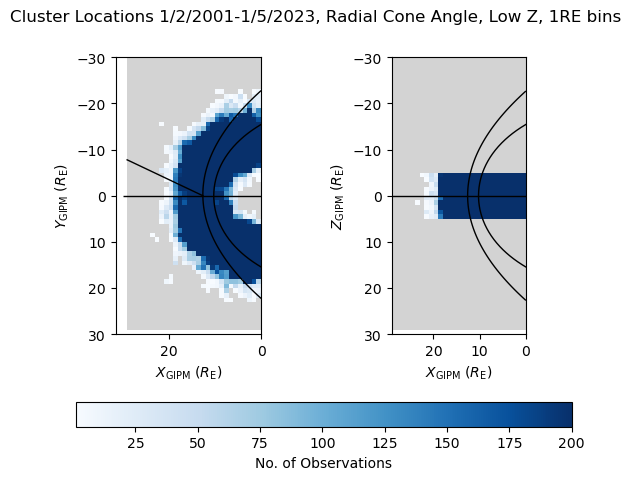

In [9]:
histo_plot(HistXY_rad, HistXZ_rad, XMA_all, xedg, yedg, zedg, 'Cluster Locations 1/2/2001-1/5/2023, Radial Cone Angle, Low Z, 1RE bins',15)

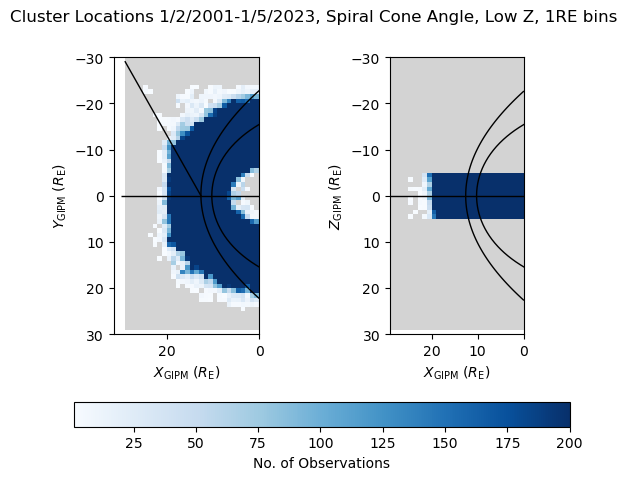

In [10]:
histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg,'Cluster Locations 1/2/2001-1/5/2023, Spiral Cone Angle, Low Z, 1RE bins',45)

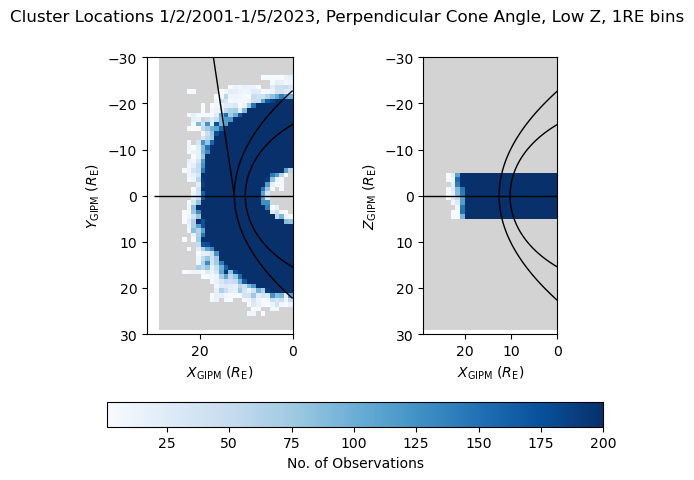

In [11]:
histo_plot(HistXY_perp, HistXZ_perp, XMA_all, xedg, yedg, zedg, 'Cluster Locations 1/2/2001-1/5/2023, Perpendicular Cone Angle, Low Z, 1RE bins',75)

Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

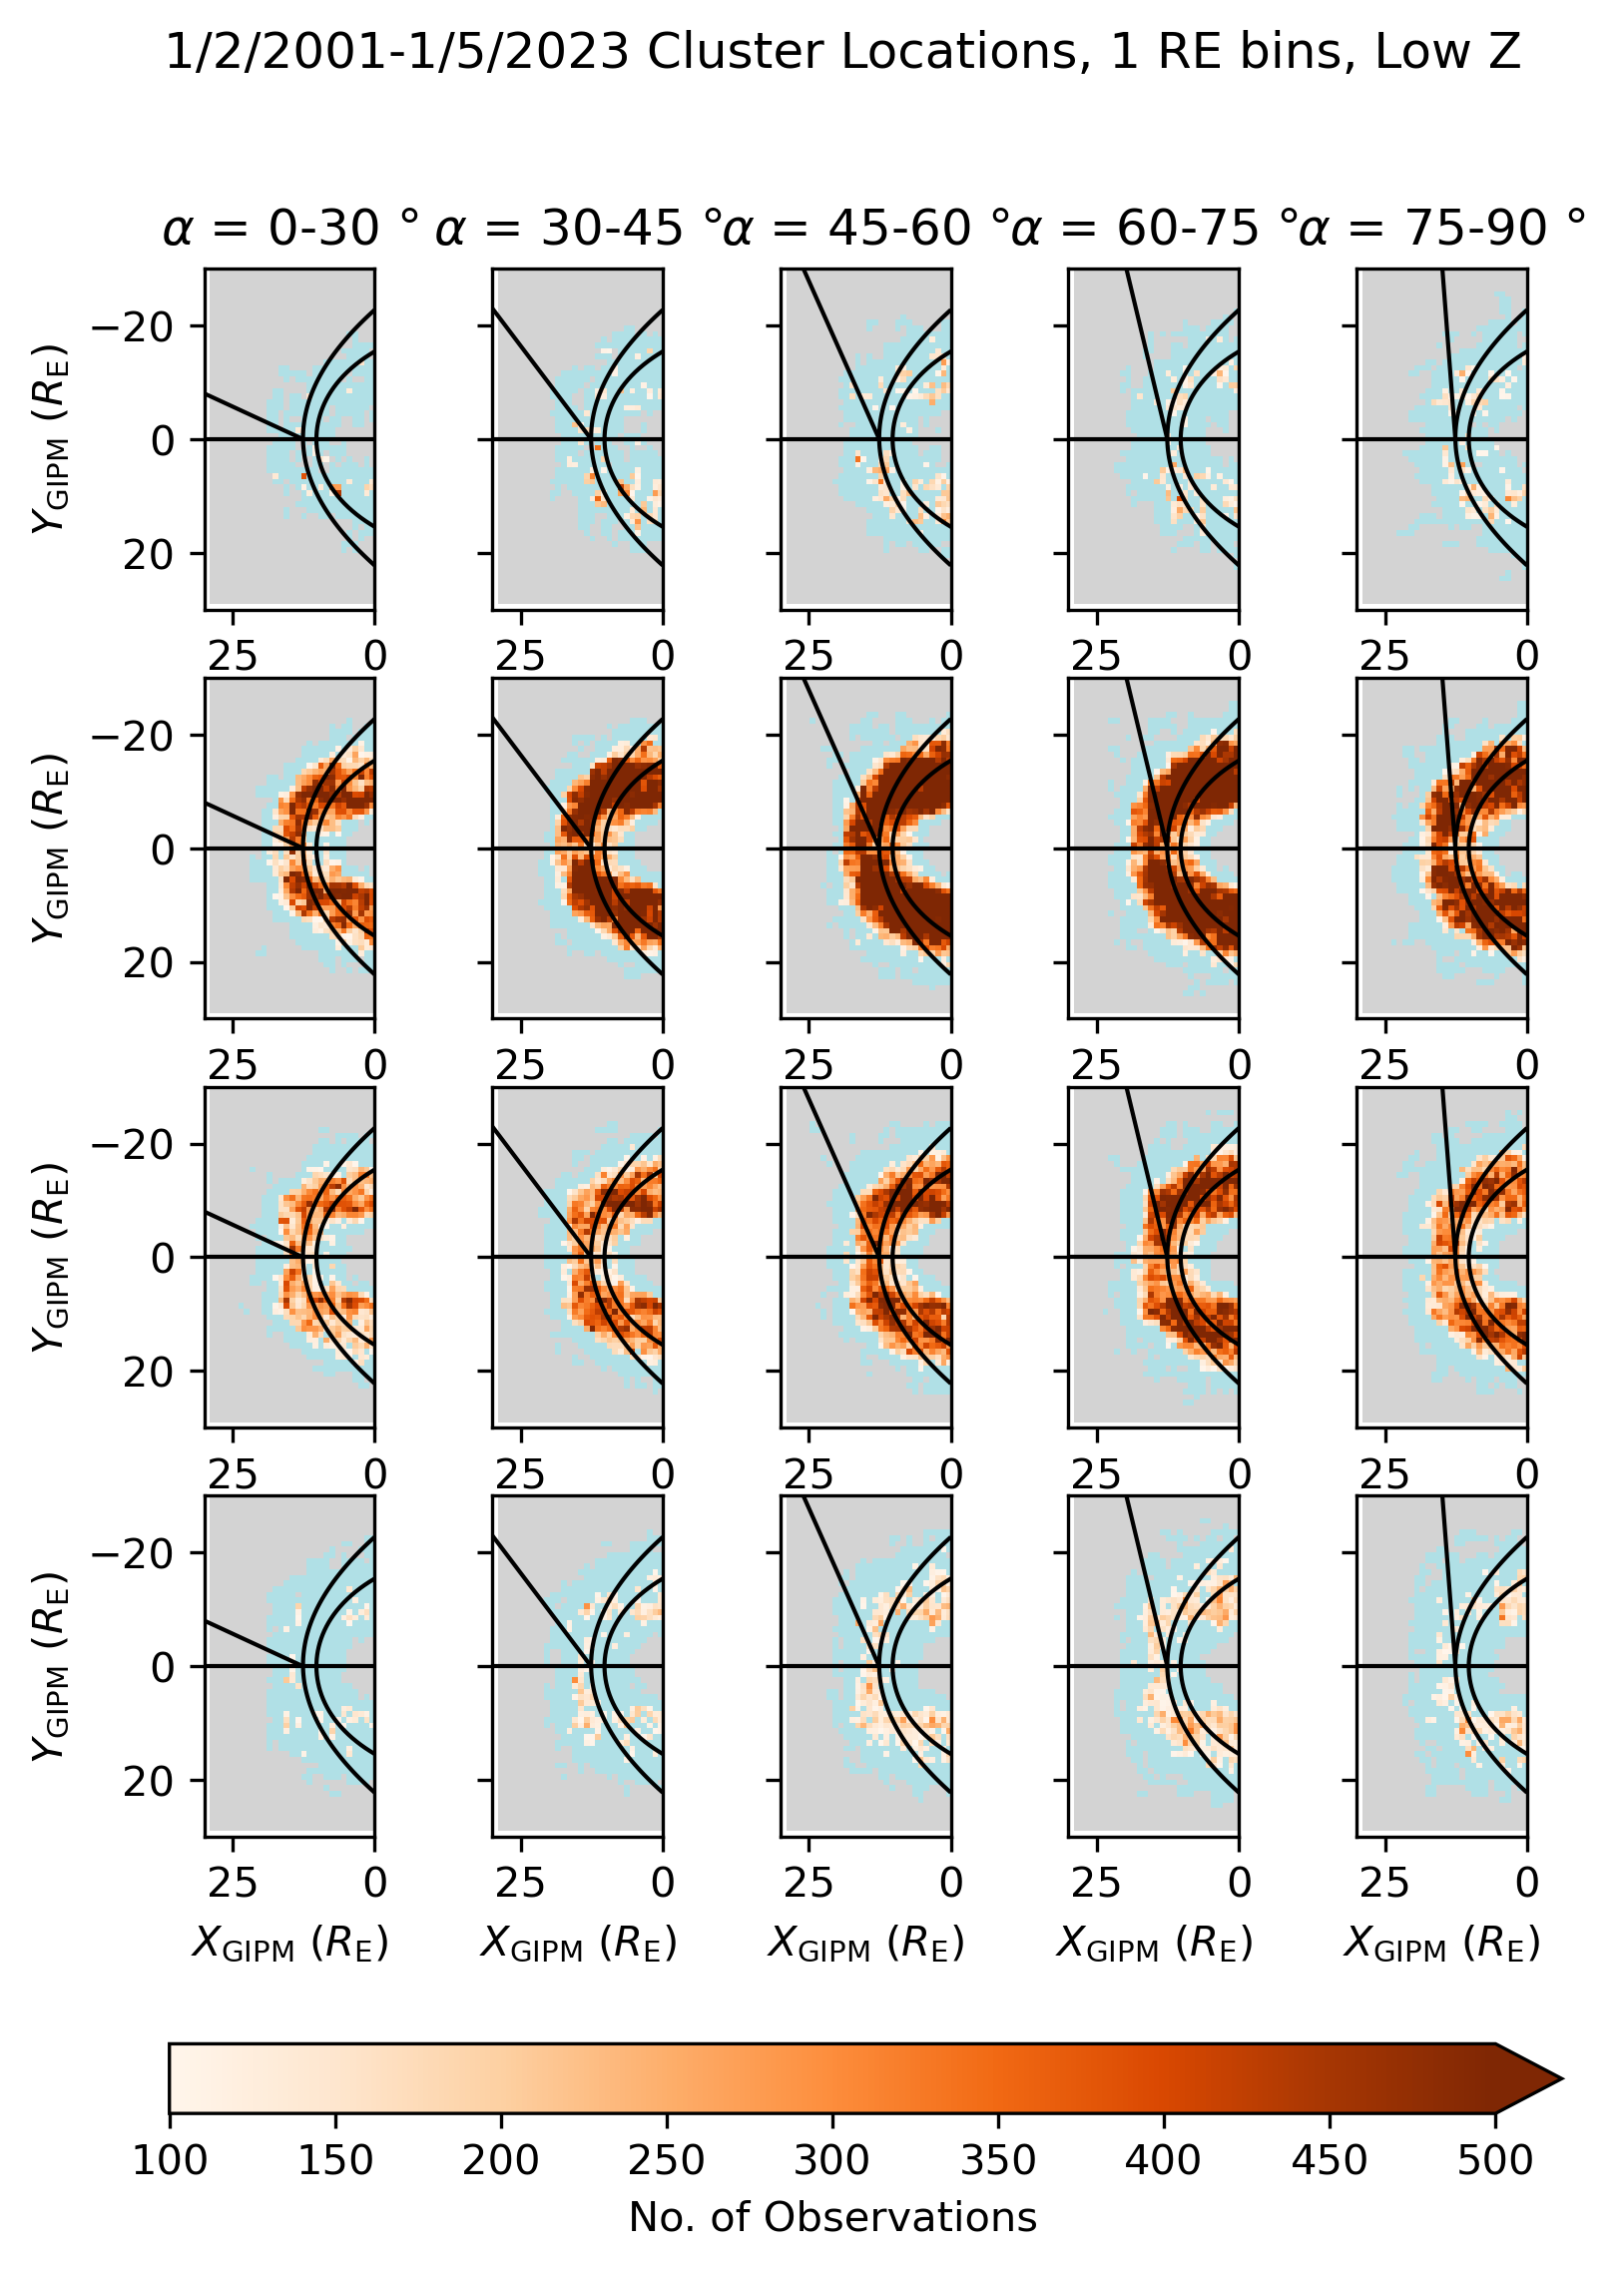

In [12]:
#histo plot function, 3x3

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#tan_angle = np.tan(np.deg2rad(angle))

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Cluster Locations, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

cmap = matplotlib.colormaps.get_cmap('Oranges') 
cmap.set_bad(color='lightgrey')
cmap.set_under(color='powderblue')

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
#ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
#cmap = matplotlib.colormaps.get_cmap('Blues') 
#cmap.set_bad(color='lightgrey')
im = ax0.imshow(HistXY_rad_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-30,30)
ax0.set_xlim(0,30)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(mappable=im,location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='max', label='No. of Observations')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax1.imshow(HistXY_rad_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-30,30)
ax1.set_xlim(0,30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax2.imshow(HistXY_rad_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-30,30)
ax2.set_xlim(0,30)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax3.imshow(HistXY_rad_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-30,30)
ax3.set_xlim(0,30)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax4.imshow(HistXY_lowspir_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-30,30)
ax4.set_xlim(0,30)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax5.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax5.imshow(HistXY_lowspir_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-30,30)
ax5.set_xlim(0,30)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax6.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax6.imshow(HistXY_lowspir_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-30,30)
ax6.set_xlim(0,30)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax7.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax7.imshow(HistXY_lowspir_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], zedg[0], zedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-30,30)
ax7.set_xlim(0,30)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax8.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax8.imshow(HistXY_highspir_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-30,30)
ax8.set_xlim(0,30)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax9.imshow(HistXY_highspir_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-30,30)
ax9.set_xlim(0,30)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax10.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax10.imshow(HistXY_highspir_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-30,30)
ax10.set_xlim(0,30)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax1.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax11.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax11.imshow(HistXY_highspir_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-30,30)
ax11.set_xlim(0,30)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

ax12.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax12.imshow(HistXY_lowperp_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-30,30)
ax12.set_xlim(0,30)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax13.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax13.imshow(HistXY_lowperp_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-30,30)
ax13.set_xlim(0,30)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax14.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax14.imshow(HistXY_lowperp_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-30,30)
ax14.set_xlim(0,30)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax15.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax15.imshow(HistXY_lowperp_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-30,30)
ax15.set_xlim(0,30)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

ax16.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax16.imshow(HistXY_highperp_less5, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-30,30)
ax16.set_xlim(0,30)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')
#ax17.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax17.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax17.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax17.imshow(HistXY_highperp_5_10, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-30,30)
ax17.set_xlim(0,30)
ax17.invert_xaxis()
ax17.invert_yaxis()

ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')
#ax18.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax18.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax18.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax18.imshow(HistXY_highperp_10_15, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-30,30)
ax18.set_xlim(0,30)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')
#ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax19.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax19.hlines(y=0, xmin= 0, xmax=30, linewidth=1, color='k')
ax19.imshow(HistXY_highperp_15more, interpolation='none', origin='lower', extent=[xedg[0], xedg[-1], yedg[0], yedg[-1]], vmin=100, vmax=500, cmap = cmap)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-30,30)
ax19.set_xlim(0,30)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

In [50]:
#BINNING SCRIPT


def bin_lister(cluster_df, bin_size):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??

    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []

    for j in bin_lists:
        #intermediate list for taking mean
        int_list = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            b_rat = mask['B mean']
            int_list.extend(b_rat)
        
        if len(int_list) >= 100:
            mean_mean_rat = sum(int_list)/len(int_list)
            mean_ratio_perbin.append(mean_mean_rat)
        
        else:
            #print('binned:', len(int_list))
            mean_ratio_perbin.append(np.nan)
        
    return(mean_ratio_perbin)


In [44]:
#plotting function

def binned_plot(rad_list, spir_list, perp_list, bin_size, x_limit, y_limit):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    minus_y_limit = (-1)*y_limit


    ###################
    fig = plt.figure(figsize=(8, 5.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rad_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 0-30$\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.xaxis.set_minor_locator(MultipleLocator(5))
    ax0.yaxis.set_minor_locator(MultipleLocator(5))
    
    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_0)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(minus_y_limit,y_limit)
    ax0.set_xlim(0,x_limit)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(spir_list)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'$\alpha$ = 30-60$\degree$')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(minus_y_limit,y_limit)
    ax1.set_xlim(0,x_limit)
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.xaxis.set_minor_locator(MultipleLocator(5))
    ax1.yaxis.set_minor_locator(MultipleLocator(5))
    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(perp_list)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axsLeft[2]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_2)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'$\alpha$ = 60-90$\degree$')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(minus_y_limit,y_limit)
    ax2.set_xlim(0,x_limit)
    ax2.invert_xaxis()
    ax2.xaxis.set_minor_locator(MultipleLocator(5))
    ax2.yaxis.set_minor_locator(MultipleLocator(5))
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [48]:
#plotting function

def binned_plot(rad_list, spir_list, perp_list, bin_size, x_limit, y_limit):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    minus_y_limit = (-1)*y_limit


    ###################
    fig = plt.figure(figsize=(8, 5.5))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')
    title_list = [r'$\alpha$ = 0-30$\degree$',r'$\alpha$ = 30-60$\degree$',r'$\alpha$ = 60-90$\degree$']
    angle_list = [tan_angle_0, tan_angle_1, tan_angle_2]
    
    start_index = 0
    
    for ax, Bmap, title, tan_angle in zip([ax0, ax1, ax2], [rad_list, spir_list, perp_list], title_list, angle_list):

        x_mesh = np.arange(0, 25, bin_size) 
        y_mesh = np.arange(-26, 26, bin_size)
        col_array_r = np.array(Bmap)
        x_bin_ticks = int(25/bin_size)
        y_bin_ticks = int(52/bin_size)
        color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
        color_grid_r = np.rot90(color_grid_r)
        color_grid_r = np.flipud(color_grid_r)

        ax = axsLeft[start_index]
        ax.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
        ax.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
        ax.plot(X_shue, R_shue, linewidth=1, color='k')

        ax.set_aspect('equal')
        ax.set_title(title)
        ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        ax.xaxis.set_minor_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(2))
    
        #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
        #without exceeding current bounds of plot
        inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
        X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

        x_s = X_BS_nose
        y_s = 0
        x_e = 25
        y_e = x_e*(-tan_angle)

        #want to also have line for just solar wind flow along y=0

        ax.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
        ax.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
        ax.set_ylim(minus_y_limit,y_limit)
        ax.set_xlim(0,x_limit)
        ax.invert_xaxis()
        ax.invert_yaxis()
        
        start_index = start_index+1

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.4), pad=0.3, ax=axsLeft,extend='max', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


In [24]:
mean_rat_rad = bin_lister(df_radial, 1)
mean_rat_spir = bin_lister(df_spiral, 1)
mean_rat_perp = bin_lister(df_perpendicular, 1)

binned: 0
binned: 0
binned: 0
binned: 20
binned: 46
binned: 60
binned: 82
binned: 45
binned: 1
binned: 1
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 74
binned: 45
binned: 48
binned: 71
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 2
binned: 48
binned: 1
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 5
binned: 21
binned: 60
binned: 54
binned: 9
binned: 2
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 97
binned: 53
binned: 13
binned: 8
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 20
binned: 65
binned: 25
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 6
binned: 2
binned: 76
binned: 54
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 17
binned: 49
binned: 43
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 0
binned: 3
binned: 92
binned: 37
binned: 44
binned: 34
bi

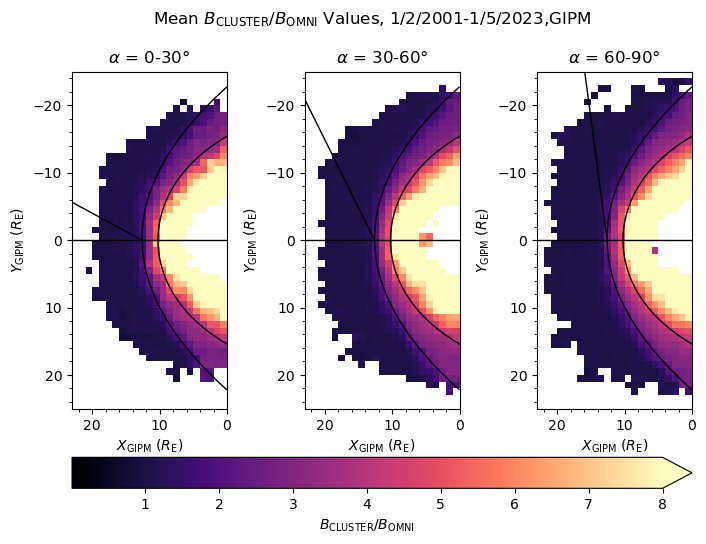

In [52]:
binned_plot(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1, x_limit=23, y_limit=25)

In [ ]:
binned_plot_new(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1)

In [ ]:
omni_all_nodup = omni_all.drop_duplicates()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 3.5), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=False)
subfigs.suptitle(r'Upstream Conditions, 01/02/2001-01/05/2023')

ax0 = axsLeft[0]

#ax0.set_title(r'$M_\mathrm{A}$', fontsize=10)
ax0.hist(omni_all_nodup['M_A'],bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,28,32,36,40,50], facecolor='skyblue', edgecolor='darkblue')
ax0.set_yscale('log')
ax0.set_ylabel('No. of Intervals')
ax0.set_xlabel(r'$M_\mathrm{A}$')
ax0.set_xlim(0,20)
ax0.xaxis.set_minor_locator(MultipleLocator(2))


ax1 = axsLeft[1]

#ax1.set_title(r'$N_\mathrm{P}$', fontsize=10)
ax1.hist(omni_all_nodup['Np'], bins=[0,2,4,6,8,10,12,14,16,18,20], facecolor='skyblue', edgecolor='darkblue')
ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.set_yscale('log')
ax1.set_xlabel(r'$N_\mathrm{P}$, /cc')
ax1.set_xlim(0,20)

ax2 = axsLeft[2]

#ax2.set_title(r'$B_\mathrm{mag}$', fontsize=10)
ax2.hist(omni_all_nodup['B_mag'],bins=[0,2,4,6,8,10,12,14,16,18,20], facecolor='skyblue', edgecolor='darkblue')
ax2.set_xlim(0,20)
ax2.set_xlabel(r'$B_\mathrm{mag}$, nT')
ax2.set_yscale('log')

ax3 = axsLeft[3]

#ax3.set_title(r'$V_\mathrm{gse}$', fontsize=10)
ax3.hist(omni_all_nodup['V_gse'],[200,300,400,500,600,700,800], facecolor='skyblue', edgecolor='darkblue')
ax3.set_xlabel(r'$V_\mathrm{gse}$, km/s')
ax3.set_yscale('log')

ax4 = axsLeft[4]

#ax4.set_title('Cone Angle', fontsize=10)
ax4.hist(omni_all_nodup['cone angle'], bins=[0,15, 30,45,60,75,90], facecolor='skyblue', edgecolor='darkblue')
ax4.set_xticks(ticks=[0,15, 30,45,60,75,90], labels=['0','15','30','45','60','75','90'])
ax4.set_xlabel(r'Cone Angle, $\degree$')
ax4.set_yscale('log')



In [ ]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Power Difference at higher Mach number')


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_diff_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_diff_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_diff_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_diff_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_diff_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
fig, ax = plt.subplots(figsize=(13, 3.5), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(ncols = 5, sharey=False)
subfigs.suptitle(r'22 Years OMNI Conditions')

ax0 = axsLeft[0]

ax0.set_title(r'$M_\mathrm{A}$', fontsize=10)
ax0.hist(omni_all_nodup['M_A'], bins=[0,5,10,15,20,30,40,50,60,70,80,90,100], edgecolor='black')
ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.set_ylabel('No. of Intervals')
ax0.set_xlabel(r'$M_\mathrm{A}$')
#ax0.set_xlim(1,100)

ax1 = axsLeft[1]

ax1.set_title(r'$N_\mathrm{P}$', fontsize=10)
ax1.hist(omni_all_nodup['Np'], edgecolor='black')
ax1.set_yscale('log')
ax1.set_xlabel(r'$N_\mathrm{P}$, /cc')

ax2 = axsLeft[2]

ax2.set_title(r'$B_\mathrm{mag}$', fontsize=10)
ax2.hist(omni_all_nodup['B_mag'], edgecolor='black')
ax2.set_yscale('log')
ax2.set_xlabel(r'B, nT')

ax3 = axsLeft[3]

ax3.set_title(r'$V_\mathrm{gse}$', fontsize=10)
ax3.hist(omni_all_nodup['V_gse'], edgecolor='black')
ax3.set_yscale('log')
ax3.set_xlabel(r'$V_\mathrm{gse}$, km/s')

ax4 = axsLeft[4]

ax4.set_title(r'Cone Angle, $\alpha$', fontsize=10)
ax4.hist(omni_all_nodup['cone angle'], bins=[0,10,20,30,40,50,60,70,80,90],edgecolor='black')
ax4.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90], labels=['0','10','20','30','40','50','60','70','80','90'])
ax4.set_yscale('log')
ax4.set_xlabel(r'$\alpha$, $\degree$')

In [ ]:
x_7_8 = mean_spir_array[8,:]
x_8_9 = mean_spir_array[9,:]
x_9_10 = mean_spir_array[10,:]
x_10_11 = mean_spir_array[11,:]
x_11_12 = mean_spir_array[12,:]
x_12_13 = mean_spir_array[13,:]
x_13_14 = mean_spir_array[14,:]

In [ ]:
y_space = np.linspace(-25.5, 25.5, num=52)

In [ ]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Spiral Cone Angles')
ax1.plot(y_space, x_7_8, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend()

#fig.show()

In [ ]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Spiral Cone Angles')
ax1.plot(y_space[26:], x_7_8[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8[0:26], color="#006BA4", linestyle='dashed', label=r'- Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9[0:26], linestyle='dashed', color="#FF800E", label=r'- Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10[0:26], color="#CFCFCF", linestyle='dashed', label=r'- Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11[0:26], color="#ABABAB", linestyle='dashed', label=r'- Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.set_ylim(0.5, 4)
#ax1.set_axisbelow(True)
#ax1.yaxis.grid(color='lightgray')
#ax1.xaxis.grid(color='lightgray')
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')

ax1.legend(fontsize=8)

#fig.show()

In [ ]:
#plotting function with cuts

def binned_plot_cuts(rat_list, bin_size, angle):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle = np.tan(np.deg2rad(angle))
    
    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig, ax0 = plt.subplots(1)
    fig.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rat_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'Spiral')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(-26,26)
    ax0.set_xlim(0,25)
    #ax0.vlines(x=[7.5,8.5,9.5,10.5,11.5,12.5,13.5], ymin = -26, ymax = 26, colors=["#006BA4","#FF800E","#CFCFCF","#ABABAB","#5F9ED1", "#C85200", "#FFBC79"] , label=r'7$\leq$ $X_{GIPM}$ < 8')
    ax0.invert_xaxis()
    ax0.invert_yaxis()
    ax0.xaxis.set_minor_locator(MultipleLocator(1))
    ax0.yaxis.set_minor_locator(MultipleLocator(1))

    #filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    #plt.savefig(filename, format='png', dpi = 300)

    plt.show()


In [ ]:
binned_plot_cuts(mean_rat_spir, 1, 45)

In [ ]:
binned_plot_cuts(mean_rat_rad, 1, 15)

In [ ]:
binned_plot_cuts(mean_rat_perp, 1, 75)

In [ ]:
y_space_negative = np.linspace(25.5, 0.5, num=26)

In [ ]:
y_space_negative

In [ ]:
mean_rad_array = np.array(mean_rat_rad)
mean_rad_array = mean_rad_array.reshape(25, 52)

x_7_8_rad = mean_rad_array[8,:]
x_8_9_rad = mean_rad_array[9,:]
x_9_10_rad = mean_rad_array[10,:]
x_10_11_rad = mean_rad_array[11,:]
x_11_12_rad = mean_rad_array[12,:]
x_12_13_rad = mean_rad_array[13,:]
x_13_14_rad = mean_rad_array[14,:]

In [ ]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Radial Cone Angles')
ax1.plot(y_space, x_7_8_rad, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9_rad, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10_rad, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11_rad, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12_rad, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13_rad, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14_rad, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.legend()

#fig.show()

In [ ]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Radial Cone Angles')
ax1.plot(y_space[26:], x_7_8_rad[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8_rad[0:26], color="#006BA4", linestyle='dashed', label=r'-Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9_rad[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9_rad[0:26], linestyle='dashed', color="#FF800E", label=r'-Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10_rad[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10_rad[0:26], color="#CFCFCF", linestyle='dashed', label=r'-Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11_rad[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11_rad[0:26], color="#ABABAB", linestyle='dashed', label=r'-Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12_rad[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12_rad[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13_rad[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13_rad[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14_rad[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14_rad[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.set_ylim(0.5, 4)
ax1.legend(fontsize=8)

#fig.show()

In [ ]:
mean_perp_array = np.array(mean_rat_perp)
mean_perp_array = mean_perp_array.reshape(25, 52)

x_7_8_perp = mean_perp_array[8,:]
x_8_9_perp = mean_perp_array[9,:]
x_9_10_perp = mean_perp_array[10,:]
x_10_11_perp = mean_perp_array[11,:]
x_11_12_perp = mean_perp_array[12,:]
x_12_13_perp = mean_perp_array[13,:]
x_13_14_perp = mean_perp_array[14,:]

In [ ]:
fig, ax1 = plt.subplots(1)
fig.suptitle(r'Oblique Cone Angles')
ax1.plot(y_space, x_7_8_perp, color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space, x_8_9_perp, color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space, x_9_10_perp, color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space, x_10_11_perp, color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space, x_11_12_perp, color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space, x_12_13_perp, color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space, x_13_14_perp, color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.set_ylim(0.5,4)
ax1.legend()

#fig.show()

In [ ]:
#now reflect negative y onto positive!
y_space_negative = np.linspace(25.5, 0.5, num=26)

fig, ax1 = plt.subplots(1)
fig.suptitle(r'Oblique Cone Angles')
ax1.plot(y_space[26:], x_7_8_perp[26:], color="#006BA4", label=r'7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space_negative, x_7_8_perp[0:26], color="#006BA4", linestyle='dashed', label=r'- Y 7$\leq$ $X_{GIPM}$ < 8')
ax1.plot(y_space[26:], x_8_9_perp[26:], color="#FF800E", label=r'8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space_negative, x_8_9_perp[0:26], linestyle='dashed', color="#FF800E", label=r'- Y 8$\leq$ $X_{GIPM}$ < 9')
ax1.plot(y_space[26:], x_9_10_perp[26:], color="#CFCFCF", label=r'9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space_negative, x_9_10_perp[0:26], color="#CFCFCF", linestyle='dashed', label=r'- Y 9$\leq$ $X_{GIPM}$ < 10')
ax1.plot(y_space[26:], x_10_11_perp[26:], color="#ABABAB", label=r'10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space_negative, x_10_11_perp[0:26], color="#ABABAB", linestyle='dashed', label=r'- Y 10$\leq$ $X_{GIPM}$ < 11')
ax1.plot(y_space[26:], x_11_12_perp[26:], color="#5F9ED1", label=r'11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space_negative, x_11_12_perp[0:26], color="#5F9ED1", linestyle='dashed', label=r'-Y 11$\leq$ $X_{GIPM}$ < 12')
ax1.plot(y_space[26:], x_12_13_perp[26:], color="#C85200", label=r'12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space_negative, x_12_13_perp[0:26], color="#C85200", linestyle='dashed', label=r'-Y 12$\leq$ $X_{GIPM}$ < 13')
ax1.plot(y_space[26:], x_13_14_perp[26:], color="#FFBC79", label=r'13$\leq$ $X_{GIPM}$ < 14')
ax1.plot(y_space_negative, x_13_14_perp[0:26], color="#FFBC79",linestyle='dashed', label=r'-Y 13$\leq$ $X_{GIPM}$ < 14')
#plt.xlabel('Period (s)')
ax1.set_ylabel('Mean Bc/Bo Ratio')
ax1.set_xlabel(r'$Y_{GIPM}$')
ax1.set_ylim(0.5, 4)
#ax1.vlines(x=0, ymin = 0, ymax = 14, linestyles='dotted', color='k')
ax1.legend(fontsize=8)

#fig.show()

In [ ]:
#plotting function

def binned_plot_cuts(rad_list, spir_list, perp_list, bin_size):
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)

    #tanfieldangle = y/x

    tan_angle_0 = np.tan(np.deg2rad(15))
    tan_angle_1 = np.tan(np.deg2rad(45))
    tan_angle_2 = np.tan(np.deg2rad(75))

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))


    ###################
    fig = plt.figure(figsize=(8, 6))
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(1, 3, sharey=False)
    #gs = gridspec.GridSpec(2, 2)
    subfigs.suptitle('Mean $B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$ Values, 1/2/2001-1/5/2023,GIPM')

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(rad_list)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'$\alpha$ = 0-30$\degree$')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_0)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    #ax0.vlines(x=)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(7,11)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_1)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(spir_list)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'$\alpha$ = 30-60$\degree$')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(7,11)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(perp_list)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axsLeft[2]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle_2)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'$\alpha$ = 60-90$\degree$')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(7,12)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    #colorbar = subfigs.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=axsLeft, location='bottom', label='Bcluster/Bomni')
    #plt.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [ ]:
binned_plot_cuts(mean_rat_rad, mean_rat_spir, mean_rat_perp, 1)

In [ ]:
#now produce a binned plot of integrated power! WIP. first split into bins and then plot

def bin_lister_fourier(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_para_perbin = []
    mean_perp_perbin = []
    para_perp_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_para = []
        int_list_perp = []
        
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            para_power = mask['Integrated Parallel Power']
            int_list_para.extend(para_power)
            perp_power = mask['Integrated Perpendicular Power']
            int_list_perp.extend(perp_power)
        
        if len(int_list_para) != 0:
            mean_para = sum(int_list_para)/len(int_list_para)
            mean_para_perbin.append(mean_para)
            mean_perp = sum(int_list_perp)/len(int_list_perp)
            mean_perp_perbin.append(mean_perp)
            para_perp = mean_para/mean_perp
            para_perp_ratio_perbin.append(para_perp)
            
            
        else:
            mean_para_perbin.append(np.nan)
            mean_perp_perbin.append(np.nan)
            para_perp_ratio_perbin.append(np.nan)
        
    return(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin)

####################################################################

def binned_plot_spec(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin, str_angle, lower_bound_cm, upper_bound_cm, cmap_choice):
    
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re
    
    cmap_spec = []
    
    if cmap_choice == 'multi':
        cmap_spec = ['magma', 'viridis']
    if cmap_choice == 'uni':
        cmap_spec = ['Blues', 'Reds']
        
    
    bin_size = 1
    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = colors.LogNorm(lower_bound_cm, upper_bound_cm)
    norm_rat = plt.Normalize(0.1,1)
    #tanfieldangle = y/x
    
    if str_angle=='Radial':
        tan_angle = np.tan(np.deg2rad(15))
    if str_angle=='Spiral':
        tan_angle = np.tan(np.deg2rad(45))
    if str_angle=='Quasi-Perpendicular':
        tan_angle = np.tan(np.deg2rad(75))    

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    over_title = str_angle +' Cone Angle, Integrated ULF Power, 1/1/2023-1/5/2023, GIPM'


    ###################
    fig = plt.figure(figsize=(8, 6.5))
    #,layout='constrained'
    subfigs = fig.subfigures(1, 2, width_ratios = [2,1])
    fig.suptitle(over_title)
    axsLeft = subfigs[0].subplots(1, 2, sharey=True)
    axRight = subfigs[1].subplots(1, 1)

    #RADIAL

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(mean_perp_perbin)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap=cmap_spec[0], norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'Transverse Power')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(0,25)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0


    col_array_1 = np.array(mean_para_perbin)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap=cmap_spec[0], norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'Compressive Power')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(0,25)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #PERP

    col_array_2 = np.array(para_perp_ratio_perbin)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axRight

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap=cmap_spec[1], norm=norm_rat)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'Compressive/Transverse Ratio')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(0,25)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_spec[0]),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='ULF Wave Power, $nT^2$')
    fig.colorbar(cm.ScalarMappable(norm=norm_rat, cmap=cmap_spec[1]),location='bottom', ax=axRight, pad=0.2,anchor=(0.5, 0), panchor=(0.5, 0.2), label='Ratio', aspect=10)
    #fig.subplots_adjust(wspace=0.5, hspace=0.1, top=0.95, bottom=0.2)
    
    filename = '/Users/apx059/Documents/Spiral ULF Power'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()


In [ ]:
#import C1/C2/C3/C4 csvs and determine min/max power
#then go back to update the colourmap norm choice

##load Cluster CSVs

cl_list = []

folder_list = ["2022_Integrated_CSVs/**", "2021_Integrated_CSVs/**","2020_Integrated_CSVs/**","2019_Integrated_CSVs/**","2018_Integrated_CSVs/**","2017_Integrated_CSVs/**","2016_Integrated_CSVs/**","2015_Integrated_CSVs/**","2014_Integrated_CSVs/**","2013_Integrated_CSVs/**","2012_Integrated_CSVs/**","2011_Integrated_CSVs/**","2010_Integrated_CSVs/**","2009_Integrated_CSVs/**","2008_Integrated_CSVs/**","2007_Integrated_CSVs/**","2006_Integrated_CSVs/**","2005_Integrated_CSVs/**","2004_Integrated_CSVs/**","2003_Integrated_CSVs/**","2002_Integrated_CSVs/**","2001_Integrated_CSVs/**"]

for folder_name in folder_list:
    path = "/Users/apx059/Documents/4_Min_Spectra/" +folder_name
    for path in glob.glob(path, recursive=True):
        cl_list.append(path)
    
#list with only files, not folders
cl_file_list = []

for element in cl_list:
    if '.csv' in element:
        if not 'OMNI' in element:
            cl_file_list.append(element)

cl_22_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace = True)
    cl_22_dfs.append(df)
    
##

cl_power_csvs = ['/Users/apx059/Documents/4_Min_Spectra/2023_C1.csv','/Users/apx059/Documents/4_Min_Spectra/2023_C2.csv','/Users/apx059/Documents/4_Min_Spectra/2023_C3.csv','/Users/apx059/Documents/4_Min_Spectra/2023_C4.csv']
cl_power_dfs = []

for file in cl_power_csvs:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace = True)
    cl_power_dfs.append(df)
    
#make new dataframes split by 1. cone angle and 2. MA
cl_power_2023 = pd.concat(cl_power_dfs)
cl_power_2022 = pd.concat(cl_22_dfs)
cl_power_2022 = cl_power_2022.rename(columns={"ULF Parallel Power": "Integrated Parallel Power", "ULF Perpendicular Power":"Integrated Perpendicular Power"})
cl_power_all = pd.concat([cl_power_2022, cl_power_2023])

df_radial = cl_power_all.loc[(cl_power_all['cone angle'] < 30) & (cl_power_all['GIPM X'].notnull())]
df_spiral = cl_power_all.loc[(cl_power_all['cone angle'] > 30) & (cl_power_all['cone angle'] < 60) & (cl_power_all['GIPM X'].notnull())]
df_perpendicular = cl_power_all.loc[(cl_power_all['cone angle'] > 60) & (cl_power_all['GIPM X'].notnull())]
    


In [ ]:
mean_para_l,mean_perp_l,para_perp_l = bin_lister_fourier(df_spiral)

In [ ]:
binned_plot_spec(mean_para_l,mean_perp_l,para_perp_l, 'Spiral', 0.01, 100)

In [ ]:
binned_plot_spec(mean_para_l,mean_perp_l,para_perp_l, 'Spiral', 0.01, 10)

In [ ]:
binned_plot_spec(mean_para_l,mean_perp_l,para_perp_l, 'Spiral', 0.1, 10)

In [ ]:
binned_plot_spec(mean_para_l,mean_perp_l,para_perp_l, 'Spiral', 0.1, 10)

In [ ]:
mean_para_l_r,mean_perp_l_r,para_perp_l_r = bin_lister_fourier(df_radial)
binned_plot_spec(mean_para_l_r,mean_perp_l_r,para_perp_l_r, 'Radial', 0.1, 10)

In [ ]:
mean_para_l_p,mean_perp_l_p,para_perp_l_p = bin_lister_fourier(df_perpendicular)
binned_plot_spec(mean_para_l_p,mean_perp_l_p,para_perp_l_p, 'Quasi-Perpendicular',0.1, 10)

In [ ]:
mean_rat_spir = bin_lister(df_spiral, 1)
binned_plot_cuts(mean_rat_spir, 1, 45)

In [ ]:
#########spiral 
#reference all X, Y, and Z

df_spir_lowZ = df_spiral.loc[(df_spiral['GIPM Z'] < 5) & (df_spiral['GIPM Z'] > -5)]

x_locs_spir = df_spir_lowZ['GIPM X'].to_numpy()
y_locs_spir = df_spir_lowZ['GIPM Y'].to_numpy()
z_locs_spir = df_spir_lowZ['GIPM Z'].to_numpy()

x_bin_edges = range(30)
y_bin_edges = range(-30,30)
z_bin_edges = range(-30,30)

##use numpy histogram to get actual bin numbers

HistXY_spir, xedg, yedg = np.histogram2d(x_locs_spir, y_locs_spir, bins=[x_bin_edges, y_bin_edges])
HistXY_spir = HistXY_spir.T

z_bin_edges = range(-30,30)
HistXZ_spir, xedg, zedg = np.histogram2d(x_locs_spir, z_locs_spir, bins=[x_bin_edges, z_bin_edges])
HistXZ_spir = HistXZ_spir.T

HistXY_spir[HistXY_spir == 0] = np.nan
HistXZ_spir[HistXZ_spir == 0] = np.nan


histo_plot(HistXY_spir, HistXZ_spir, XMA_all, xedg, yedg, zedg,'Cluster Locations 1/1/2001-1/5/2023, Spiral Cone Angle, Low Z, 1RE bins',45)

In [ ]:
print(np.nanmin(para_perp_l_p), np.nanmax(para_perp_l_p))

In [ ]:
#BINNING SCRIPT


def bin_lister_all_stats(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_ratio_perbin = []
    median_ratio_perbin = []
    #mode_ratio_perbin = []
    std_dev_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_mean = []
        int_list_median = []
        #int_list_mode = []
        int_list_std_dev = []
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            mean_rat = mask['B median']
            int_list_mean.extend(mean_rat)
            median_rat = mask['B mean']
            int_list_median.extend(median_rat)
            std_rat = mask['B standard deviation']
            int_list_std_dev.extend(std_rat)
        
        if len(int_list_mean) != 0:
            mean_mean_rat = sum(int_list_mean)/len(int_list_mean)
            mean_ratio_perbin.append(mean_mean_rat)
            mean_median_rat = sum(int_list_median)/len(int_list_median)
            median_ratio_perbin.append(mean_median_rat)
            #mean_mode_rat = sum(int_list_mode)/len(int_list_mode)
            #mode_ratio_perbin.append(mean_mode_rat)
            mean_std_dev_rat = sum(int_list_std_dev)/len(int_list_std_dev)
            std_dev_ratio_perbin.append(mean_std_dev_rat)
        else:
            mean_ratio_perbin.append(np.nan)
            median_ratio_perbin.append(np.nan)
            #mode_ratio_perbin.append(np.nan)
            std_dev_ratio_perbin.append(np.nan)
            
    return(mean_ratio_perbin, median_ratio_perbin, std_dev_ratio_perbin)


In [ ]:
mean_r_spir, median_r_spir, std_dev_r_spir = bin_lister_all_stats(df_spiral)

In [ ]:
def binned_plot_stats(mean_ratio, median_ratio, std_ratio, str_angle):
    
    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re
    
    bin_size = 1
    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    norm = plt.Normalize(0.01,8)
    #tanfieldangle = y/x
    
    if str_angle=='Radial':
        tan_angle = np.tan(np.deg2rad(15))
    if str_angle=='Spiral':
        tan_angle = np.tan(np.deg2rad(45))
    if str_angle=='Quasi-Perpendicular':
        tan_angle = np.tan(np.deg2rad(75))    

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 2

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))
    
    over_title = str_angle +' Cone Angle, Integrated ULF Power, 1/1/2023-1/5/2023, GIPM'

    norm = plt.Normalize(0,8)
    norm_std = plt.Normalize(0,2)

    ###################

    fig = plt.figure(figsize=(8, 6.5))
    #,layout='constrained'
    subfigs = fig.subfigures(1, 2, width_ratios = [2,1])
    fig.suptitle(over_title)
    axsLeft = subfigs[0].subplots(1, 2, sharey=True)
    axRight = subfigs[1].subplots(1, 1)

    #subfigs.suptitle('FFT Intervals, Spiral Cone Angles, 1/1/2023-1/5/2023,GIPM')

    #MEAN

    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    col_array_r = np.array(mean_ratio)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)
    color_grid_r = col_array_r.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_r = np.rot90(color_grid_r)
    color_grid_r = np.flipud(color_grid_r)
    
    ax0 = axsLeft[0]
    ax0.pcolormesh(x_mesh, y_mesh, color_grid_r[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax0.plot(X_shue, R_shue, linewidth=1, color='k')

    ax0.set_aspect('equal')
    ax0.set_title(r'Mean Compression')
    ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax0.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)
    #ax0.vlines(x=)
    ax0.set_ylim(-30,30)
    ax0.set_xlim(0,25)
    ax0.invert_xaxis()
    ax0.invert_yaxis()


    ax1 = axsLeft[1]

    #SPIRAL
    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    col_array_1 = np.array(median_ratio)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    ax1.set_aspect('equal')
    ax1.set_title(r'Median Compression')
    ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylim(-30,30)
    ax1.set_xlim(0,25)
    ax1.invert_xaxis()
    ax1.invert_yaxis()

    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'), ax=ax1)

    #PERP

    col_array_2 = np.array(std_ratio)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2 = axRight

    x_s = X_BS_nose
    y_s = 0
    x_e = 25
    y_e = x_e*(-tan_angle)

    #want to also have line for just solar wind flow along y=0

    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.plot([x_s, x_e], [y_s, y_e], color='k',linewidth=1)

    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm_std)
    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    ax2.set_title(r'Standard Deviation')
    ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylim(-30,30)
    ax2.set_xlim(0,25)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad=0.2, ax=axsLeft, label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')
    fig.colorbar(cm.ScalarMappable(norm=norm_std, cmap='viridis'),location='bottom', ax=axRight, pad=0.2,anchor=(0.5, 0), panchor=(0.5, 0.2), label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$', aspect=10)
    
    filename = '/Users/apx059/Documents/Narrow Z GIPM Binned Plot 1yr'+'.png'
    plt.savefig(filename, format='png', dpi = 300)

    #plt.show()



In [ ]:
binned_plot_stats(mean_r_spir, median_r_spir, std_dev_r_spir, 'Spiral')

In [ ]:
np.all(mean_r_spir == median_r_spir)

In [ ]:
XMA_all = 10

In [ ]:
#now produce a binned plot of integrated power!first split into bins and then plot
#change to do mean of ratios not ratio of means

def bin_lister_fourier_no_bad_stats(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_para_perbin = []
    mean_perp_perbin = []
    para_perp_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_para = []
        int_list_perp = []
        
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            para_power = mask['Integrated Parallel Power']
            int_list_para.extend(para_power)
            perp_power = mask['Integrated Perpendicular Power']
            int_list_perp.extend(perp_power)
        
        if len(int_list_para) >= 100:
            mean_para = sum(int_list_para)/len(int_list_para)
            mean_para_perbin.append(mean_para)
            mean_perp = sum(int_list_perp)/len(int_list_perp)
            mean_perp_perbin.append(mean_perp)
            #para_perp = mean_para/mean_perp
            int_list_para_ar = np.array(int_list_para)
            int_list_perp_ar = np.array(int_list_perp)
            para_perp_ar = int_list_para_ar/int_list_perp_ar
            para_perp = np.mean(para_perp_ar)
            para_perp_ratio_perbin.append(para_perp)
            
            
        else:
            mean_para_perbin.append(np.nan)
            mean_perp_perbin.append(np.nan)
            para_perp_ratio_perbin.append(np.nan)
        
    return(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin)

In [ ]:
mean_para_l_na,mean_perp_l_na,para_perp_l_na = bin_lister_fourier_no_bad_stats(df_spiral)

In [ ]:
binned_plot_spec(mean_para_l_na,mean_perp_l_na,para_perp_l_na, 'Spiral', 0.1, 10, 'uni')

In [ ]:
binned_plot_spec(mean_para_l_na,mean_perp_l_na,para_perp_l_na, 'Spiral', 0.1, 10, 'multi')

In [ ]:
#MA and CA splitting, do perpendicular power for all MA and CA in 5 x 4 grid

##first, make the individual bin lists

#########RADIAL######
df_rad_lowZ = df_radial.loc[(df_radial['GIPM Z'] < 5) & (df_radial['GIPM Z'] > -5)]
#radial
df_rad_less5 = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] < 5)]
df_rad_5_10 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 5) & (df_rad_lowZ['M_A'] < 10))]
df_rad_10_15 = df_rad_lowZ.loc[((df_rad_lowZ['M_A'] >= 10) & (df_rad_lowZ['M_A'] < 15))]
df_rad_15more = df_rad_lowZ.loc[(df_rad_lowZ['M_A'] >= 15)]

###BELOW 5MA

mean_para_rad_less5,mean_perp_rad_less5,para_perp_rad_less5 = bin_lister_fourier_no_bad_stats(df_rad_less5)

###5-10 MA

mean_para_rad_5_10,mean_perp_rad_5_10,para_perp_rad_5_10 = bin_lister_fourier_no_bad_stats(df_rad_5_10)

###10-15 MA

mean_para_rad_10_15,mean_perp_rad_10_15,para_perp_rad_10_15 = bin_lister_fourier_no_bad_stats(df_rad_10_15)

###OVER 15MA

mean_para_rad_15more,mean_perp_rad_15more,para_perp_rad_15more = bin_lister_fourier_no_bad_stats(df_rad_15more)

####now DFs for low and high spiral and perp

df_lowspiral = cl_power_all.loc[(cl_power_all['cone angle'] > 30) & (cl_power_all['cone angle'] < 45) & (cl_power_all['GIPM X'].notnull())]
df_highspiral = cl_power_all.loc[(cl_power_all['cone angle'] > 45) & (cl_power_all['cone angle'] < 60) & (cl_power_all['GIPM X'].notnull())]
df_lowperpendicular = cl_power_all.loc[(cl_power_all['cone angle'] > 60) & (cl_power_all['cone angle'] < 75) & (cl_power_all['GIPM X'].notnull())]
df_highperpendicular = cl_power_all.loc[(cl_power_all['cone angle'] > 75) & (cl_power_all['GIPM X'].notnull())]

df_lowspir_lowZ = df_lowspiral.loc[(df_lowspiral['GIPM Z'] < 5) & (df_lowspiral['GIPM Z'] > -5)]
df_lowperp_lowZ = df_lowperpendicular.loc[(df_lowperpendicular['GIPM Z'] < 5) & (df_lowperpendicular['GIPM Z'] > -5)]
df_highspir_lowZ = df_highspiral.loc[(df_highspiral['GIPM Z'] < 5) & (df_highspiral['GIPM Z'] > -5)]
df_highperp_lowZ = df_highperpendicular.loc[(df_highperpendicular['GIPM Z'] < 5) & (df_highperpendicular['GIPM Z'] > -5)]

#lowspiral 

df_lowspir_less5 = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] < 5)]
df_lowspir_5_10 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 5) & (df_lowspir_lowZ['M_A'] < 10))]
df_lowspir_10_15 = df_lowspir_lowZ.loc[((df_lowspir_lowZ['M_A'] >= 10) & (df_lowspir_lowZ['M_A'] < 15))]
df_lowspir_15more = df_lowspir_lowZ.loc[(df_lowspir_lowZ['M_A'] >= 15)]

#highspiral 

df_highspir_less5 = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] < 5)]
df_highspir_5_10 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 5) & (df_highspir_lowZ['M_A'] < 10))]
df_highspir_10_15 = df_highspir_lowZ.loc[((df_highspir_lowZ['M_A'] >= 10) & (df_highspir_lowZ['M_A'] < 15))]
df_highspir_15more = df_highspir_lowZ.loc[(df_highspir_lowZ['M_A'] >= 15)]

#lowperpendicular

df_lowperp_less5 = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] < 5)]
df_lowperp_5_10 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 5) & (df_lowperp_lowZ['M_A'] < 10))]
df_lowperp_10_15 = df_lowperp_lowZ.loc[((df_lowperp_lowZ['M_A'] >= 10) & (df_lowperp_lowZ['M_A'] < 15))]
df_lowperp_15more = df_lowperp_lowZ.loc[(df_lowperp_lowZ['M_A'] >= 15)]

#highperpendicular

df_highperp_less5 = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] < 5)]
df_highperp_5_10 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 5) & (df_highperp_lowZ['M_A'] < 10))]
df_highperp_10_15 = df_highperp_lowZ.loc[((df_highperp_lowZ['M_A'] >= 10) & (df_highperp_lowZ['M_A'] < 15))]
df_highperp_15more = df_highperp_lowZ.loc[(df_highperp_lowZ['M_A'] >= 15)]


#########LOWSPIRAL######
###BELOW 5MA

mean_para_lowspir_less5,mean_perp_lowspir_less5,para_perp_lowspir_less5 = bin_lister_fourier_no_bad_stats(df_lowspir_less5)

###5-10 MA

mean_para_lowspir_5_10,mean_perp_lowspir_5_10,para_perp_lowspir_5_10 = bin_lister_fourier_no_bad_stats(df_lowspir_5_10)

###10-15 MA

mean_para_lowspir_10_15,mean_perp_lowspir_10_15,para_perp_lowspir_10_15 = bin_lister_fourier_no_bad_stats(df_lowspir_10_15)

###OVER 15MA

mean_para_lowspir_15more,mean_perp_lowspir_15more,para_perp_lowspir_15more = bin_lister_fourier_no_bad_stats(df_lowspir_15more)

#########HIGHSPIRAL######
###BELOW 5MA

mean_para_highspir_less5,mean_perp_highspir_less5,para_perp_highspir_less5= bin_lister_fourier_no_bad_stats(df_highspir_less5)

###5-10 MA

mean_para_highspir_5_10,mean_perp_highspir_5_10,para_perp_highspir_5_10 = bin_lister_fourier_no_bad_stats(df_highspir_5_10)

###10-15 MA

mean_para_highspir_10_15,mean_perp_highspir_10_15,para_perp_highspir_10_15 = bin_lister_fourier_no_bad_stats(df_highspir_10_15)

###OVER 15MA

mean_para_highspir_15more,mean_perp_highspir_15more,para_perp_highspir_15more = bin_lister_fourier_no_bad_stats(df_highspir_15more)


#########LOWPERP######
###BELOW 5MA

mean_para_lowperp_less5,mean_perp_lowperp_less5,para_perp_lowperp_less5 = bin_lister_fourier_no_bad_stats(df_lowperp_less5)

###5-10 MA

mean_para_lowperp_5_10,mean_perp_lowperp_5_10,para_perp_lowperp_5_10 = bin_lister_fourier_no_bad_stats(df_lowperp_5_10)

###10-15 MA

mean_para_lowperp_10_15,mean_perp_lowperp_10_15,para_perp_lowperp_10_15 = bin_lister_fourier_no_bad_stats(df_lowperp_10_15)

###OVER 15MA

mean_para_lowperp_15more,mean_perp_lowperp_15more,para_perp_lowperp_15more = bin_lister_fourier_no_bad_stats(df_lowperp_15more)

#########HIGHPERP######
###BELOW 5MA

mean_para_highperp_less5,mean_perp_highperp_less5,para_perp_highperp_less5= bin_lister_fourier_no_bad_stats(df_highperp_less5)

###5-10 MA

mean_para_highperp_5_10,mean_perp_highperp_5_10,para_perp_highperp_5_10 = bin_lister_fourier_no_bad_stats(df_highperp_5_10)

###10-15 MA

mean_para_highperp_10_15,mean_perp_highperp_10_15,para_perp_highperp_10_15 = bin_lister_fourier_no_bad_stats(df_highperp_10_15)

###OVER 15MA

mean_para_highperp_15more,mean_perp_highperp_15more,para_perp_highperp_15more = bin_lister_fourier_no_bad_stats(df_highperp_15more)




In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='Blues'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='Blues'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='ULF Band Power, $nT^2$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='Blues', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#plot w/ para/perp ratio

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive/Transverse Power Ratio, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = plt.Normalize(0.1,1)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(para_perp_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Ratio of Compressive to Transverse Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(para_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(para_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(para_perp_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(para_perp_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(para_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(para_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(para_perp_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(para_perp_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(para_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(para_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(para_perp_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(para_perp_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(para_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(para_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(para_perp_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(para_perp_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(para_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(para_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(para_perp_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now 2RE bins pls

#now produce a binned plot of integrated power!first split into bins and then plot
#change to do mean of ratios not ratio of means

def bin_lister_fourier_no_bad_stats_2Re(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 24 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 2
    n = 24/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (24/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_para_perbin = []
    mean_perp_perbin = []
    para_perp_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_para = []
        int_list_perp = []
        
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            para_power = mask['Integrated Parallel Power']
            int_list_para.extend(para_power)
            perp_power = mask['Integrated Perpendicular Power']
            int_list_perp.extend(perp_power)
        
        if len(int_list_para) >= 100:
            mean_para = sum(int_list_para)/len(int_list_para)
            mean_para_perbin.append(mean_para)
            mean_perp = sum(int_list_perp)/len(int_list_perp)
            mean_perp_perbin.append(mean_perp)
            #para_perp = mean_para/mean_perp
            int_list_para_ar = np.array(int_list_para)
            int_list_perp_ar = np.array(int_list_perp)
            para_perp_ar = int_list_para_ar/int_list_perp_ar
            para_perp = np.mean(para_perp_ar)
            para_perp_ratio_perbin.append(para_perp)
            
            
        else:
            mean_para_perbin.append(np.nan)
            mean_perp_perbin.append(np.nan)
            para_perp_ratio_perbin.append(np.nan)
        
    return(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin)



In [ ]:
#MA and CA splitting, do perpendicular power for all MA and CA in 5 x 4 grid

##first, make the individual bin lists

###BELOW 5MA

mean_para_rad_less5_2bin,mean_perp_rad_less5_2bin,para_perp_rad_less5_2bin = bin_lister_fourier_no_bad_stats_2Re(df_rad_less5)

###5-10 MA

mean_para_rad_5_10_2bin,mean_perp_rad_5_10_2bin,para_perp_rad_5_10_2bin = bin_lister_fourier_no_bad_stats_2Re(df_rad_5_10)

###10-15 MA

mean_para_rad_10_15_2bin,mean_perp_rad_10_15_2bin,para_perp_rad_10_15_2bin = bin_lister_fourier_no_bad_stats_2Re(df_rad_10_15)

###OVER 15MA

mean_para_rad_15more_2bin,mean_perp_rad_15more_2bin,para_perp_rad_15more_2bin = bin_lister_fourier_no_bad_stats_2Re(df_rad_15more)


#########LOWSPIRAL######
###BELOW 5MA

mean_para_lowspir_less5_2bin,mean_perp_lowspir_less5_2bin,para_perp_lowspir_less5_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowspir_less5)

###5-10 MA

mean_para_lowspir_5_10_2bin,mean_perp_lowspir_5_10_2bin,para_perp_lowspir_5_10_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowspir_5_10)

###10-15 MA

mean_para_lowspir_10_15_2bin,mean_perp_lowspir_10_15_2bin,para_perp_lowspir_10_15_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowspir_10_15)

###OVER 15MA

mean_para_lowspir_15more_2bin,mean_perp_lowspir_15more_2bin,para_perp_lowspir_15more_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowspir_15more)

#########HIGHSPIRAL######
###BELOW 5MA

mean_para_highspir_less5_2bin,mean_perp_highspir_less5_2bin,para_perp_highspir_less5_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highspir_less5)

###5-10 MA

mean_para_highspir_5_10_2bin,mean_perp_highspir_5_10_2bin,para_perp_highspir_5_10_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highspir_5_10)

###10-15 MA

mean_para_highspir_10_15_2bin,mean_perp_highspir_10_15_2bin,para_perp_highspir_10_15_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highspir_10_15)

###OVER 15MA

mean_para_highspir_15more_2bin,mean_perp_highspir_15more_2bin,para_perp_highspir_15more_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highspir_15more)


#########LOWPERP######
###BELOW 5MA

mean_para_lowperp_less5_2bin,mean_perp_lowperp_less5_2bin,para_perp_lowperp_less5_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowperp_less5)

###5-10 MA

mean_para_lowperp_5_10_2bin,mean_perp_lowperp_5_10_2bin,para_perp_lowperp_5_10_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowperp_5_10)

###10-15 MA

mean_para_lowperp_10_15_2bin,mean_perp_lowperp_10_15_2bin,para_perp_lowperp_10_15_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowperp_10_15)

###OVER 15MA

mean_para_lowperp_15more_2bin,mean_perp_lowperp_15more_2bin,para_perp_lowperp_15more_2bin = bin_lister_fourier_no_bad_stats_2Re(df_lowperp_15more)

#########HIGHPERP######
###BELOW 5MA

mean_para_highperp_less5_2bin,mean_perp_highperp_less5_2bin,para_perp_highperp_less5_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highperp_less5)

###5-10 MA

mean_para_highperp_5_10_2bin,mean_perp_highperp_5_10_2bin,para_perp_highperp_5_10_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highperp_5_10)

###10-15 MA

mean_para_highperp_10_15_2bin,mean_perp_highperp_10_15_2bin,para_perp_highperp_10_15_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highperp_10_15)

###OVER 15MA

mean_para_highperp_15more_2bin,mean_perp_highperp_15more_2bin,para_perp_highperp_15more_2bin = bin_lister_fourier_no_bad_stats_2Re(df_highperp_15more)




In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 2 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 2
x_mesh = np.arange(0, 24, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(24/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5_2bin)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='ULF Band Power, $nT^2$'')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_2bin)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15_2bin)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more_2bin)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5_2bin)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_2bin)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_2bin)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more_2bin)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5_2bin)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_2bin)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_2bin)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more_2bin)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5_2bin)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10_2bin)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_2bin)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more_2bin)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5_2bin)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_2bin)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_2bin)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more_2bin)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 2 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 2
x_mesh = np.arange(0, 24, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(24/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5_2bin)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='ULF Band Power, $nT^2$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10_2bin)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15_2bin)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more_2bin)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5_2bin)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10_2bin)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15_2bin)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more_2bin)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5_2bin)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10_2bin)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15_2bin)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more_2bin)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5_2bin)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_2bin)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15_2bin)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more_2bin)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5_2bin)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10_2bin)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15_2bin)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more_2bin)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive/Transverse ULF Wave Power Ratio, 2 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = plt.Normalize(0.1,1)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 2
x_mesh = np.arange(0, 24, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(24/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(para_perp_rad_less5_2bin)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Compressive/Transverse Ratio')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(para_perp_rad_5_10_2bin)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(para_perp_rad_10_15_2bin)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(para_perp_rad_15more_2bin)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(para_perp_lowspir_less5_2bin)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(para_perp_lowspir_5_10_2bin)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(para_perp_lowspir_10_15_2bin)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(para_perp_lowspir_15more_2bin)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(para_perp_highspir_less5_2bin)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(para_perp_highspir_5_10_2bin)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(para_perp_highspir_10_15_2bin)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(para_perp_highspir_15more_2bin)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(para_perp_lowperp_less5_2bin)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(para_perp_lowperp_5_10_2bin)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(para_perp_lowperp_10_15_2bin)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(para_perp_lowperp_15more_2bin)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(para_perp_highperp_less5_2bin)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(para_perp_highperp_5_10_2bin)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(para_perp_highperp_10_15_2bin)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(para_perp_highperp_15more_2bin)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
##subtract values to see differences

### want 5-10, 10-15 comparison. can also do 15more but that is secondary. Radial.

mean_para_rad_5_10_arr = np.array(mean_para_rad_5_10)
mean_perp_rad_5_10_arr = np.array(mean_perp_rad_5_10)
para_perp_rad_5_10_arr = np.array(para_perp_rad_5_10)

mean_para_rad_10_15_arr = np.array(mean_para_rad_10_15)
mean_perp_rad_10_15_arr = np.array(mean_perp_rad_10_15)
para_perp_rad_10_15_arr = np.array(para_perp_rad_10_15)

para_diff_rad_5_10_15 = mean_para_rad_10_15_arr - mean_para_rad_5_10_arr
perp_diff_rad_5_10_15 = mean_perp_rad_10_15_arr - mean_perp_rad_5_10_arr
ratio_diff_rad_5_10_15 = para_perp_rad_10_15_arr - para_perp_rad_5_10_arr

para_ratio_rad_5_10_15 = mean_para_rad_10_15_arr/mean_para_rad_5_10_arr
perp_ratio_rad_5_10_15 = mean_perp_rad_10_15_arr/mean_perp_rad_5_10_arr
ratio_ratio_rad_5_10_15 = para_perp_rad_10_15_arr/para_perp_rad_5_10_arr

#########LOWSPIRAL######

mean_para_lowspir_5_10_arr = np.array(mean_para_lowspir_5_10)
mean_perp_lowspir_5_10_arr = np.array(mean_perp_lowspir_5_10)
para_perp_lowspir_5_10_arr = np.array(para_perp_lowspir_5_10)

mean_para_lowspir_10_15_arr = np.array(mean_para_lowspir_10_15)
mean_perp_lowspir_10_15_arr = np.array(mean_perp_lowspir_10_15)
para_perp_lowspir_10_15_arr = np.array(para_perp_lowspir_10_15)

para_ratio_lowspir_5_10_15 = mean_para_lowspir_10_15_arr/mean_para_lowspir_5_10_arr
perp_ratio_lowspir_5_10_15 = mean_perp_lowspir_10_15_arr/mean_perp_lowspir_5_10_arr
ratio_ratio_lowspir_5_10_15 = para_perp_lowspir_10_15_arr/para_perp_lowspir_5_10_arr

#########HIGHSPIRAL######

mean_para_highspir_5_10_arr = np.array(mean_para_highspir_5_10)
mean_perp_highspir_5_10_arr = np.array(mean_perp_highspir_5_10)
para_perp_highspir_5_10_arr = np.array(para_perp_highspir_5_10)

mean_para_highspir_10_15_arr = np.array(mean_para_highspir_10_15)
mean_perp_highspir_10_15_arr = np.array(mean_perp_highspir_10_15)
para_perp_highspir_10_15_arr = np.array(para_perp_highspir_10_15)

para_ratio_highspir_5_10_15 = mean_para_highspir_10_15_arr/mean_para_highspir_5_10_arr
perp_ratio_highspir_5_10_15 = mean_perp_highspir_10_15_arr/mean_perp_highspir_5_10_arr
ratio_ratio_highspir_5_10_15 = para_perp_highspir_10_15_arr/para_perp_highspir_5_10_arr

#########LOWPERP######

mean_para_lowperp_5_10_arr = np.array(mean_para_lowperp_5_10)
mean_perp_lowperp_5_10_arr = np.array(mean_perp_lowperp_5_10)
para_perp_lowperp_5_10_arr = np.array(para_perp_lowperp_5_10)

mean_para_lowperp_10_15_arr = np.array(mean_para_lowperp_10_15)
mean_perp_lowperp_10_15_arr = np.array(mean_perp_lowperp_10_15)
para_perp_lowperp_10_15_arr = np.array(para_perp_lowperp_10_15)

para_diff_lowperp_5_10_15 = mean_para_lowperp_10_15_arr - mean_para_lowperp_5_10_arr
perp_diff_lowperp_5_10_15 = mean_perp_lowperp_10_15_arr - mean_perp_lowperp_5_10_arr
ratio_diff_lowperp_5_10_15 = para_perp_lowperp_10_15_arr - para_perp_lowperp_5_10_arr

para_ratio_lowperp_5_10_15 = mean_para_lowperp_10_15_arr/mean_para_lowperp_5_10_arr
perp_ratio_lowperp_5_10_15 = mean_perp_lowperp_10_15_arr/mean_perp_lowperp_5_10_arr
ratio_ratio_lowperp_5_10_15 = para_perp_lowperp_10_15_arr/para_perp_lowperp_5_10_arr

#########HIGHPERP######

mean_para_highperp_5_10_arr = np.array(mean_para_highperp_5_10)
mean_perp_highperp_5_10_arr = np.array(mean_perp_highperp_5_10)
para_perp_highperp_5_10_arr = np.array(para_perp_highperp_5_10)

mean_para_highperp_10_15_arr = np.array(mean_para_highperp_10_15)
mean_perp_highperp_10_15_arr = np.array(mean_perp_highperp_10_15)
para_perp_highperp_10_15_arr = np.array(para_perp_highperp_10_15)

para_diff_highperp_5_10_15 = mean_para_highperp_10_15_arr - mean_para_highperp_5_10_arr
perp_diff_highperp_5_10_15 = mean_perp_highperp_10_15_arr - mean_perp_highperp_5_10_arr
ratio_diff_highperp_5_10_15 = para_perp_highperp_10_15_arr - para_perp_highperp_5_10_arr

para_ratio_highperp_5_10_15 = mean_para_highperp_10_15_arr/mean_para_highperp_5_10_arr
perp_ratio_highperp_5_10_15 = mean_perp_highperp_10_15_arr/mean_perp_highperp_5_10_arr
ratio_ratio_highperp_5_10_15 = para_perp_highperp_10_15_arr/para_perp_highperp_5_10_arr


In [ ]:
np.nanmax(para_diff_highperp_5_10_15)

In [ ]:
np.nanmin(perp_diff_highperp_5_10_15)

In [ ]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Difference, $\mathrm{nT}^2$'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_diff_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_diff_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_diff_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_diff_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_diff_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Difference, $\mathrm{nT}^2$'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_diff_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_diff_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_diff_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_diff_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_diff_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.1, 10)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA power/Low MA power'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_ratio_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_ratio_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_ratio_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_ratio_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_ratio_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#plot w/ two rows of 5-10 and 10-15 and then the ratioerence.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.1, 10)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA Power/Low MA Power'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_ratio_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_ratio_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_ratio_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_ratio_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_ratio_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now produce a binned plot of integrated power!first split into bins and then plot
#change to do mean of ratios not ratio of means

def binning_normB_fourier_no_bad_stats(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z']> -5) & (cluster_df['GIPM Z'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X']>= X_lb) & (cluster_df_XY['GIPM X'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y']>= Y_lb) & (mask['GIPM Y'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_para_perbin = []
    mean_perp_perbin = []
    para_perp_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_para = []
        int_list_perp = []
        
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            para_power = mask['Integrated Parallel Power']
            background_B = mask['B mean']
            norm_para_power = para_power/(background_B**2)
            int_list_para.extend(norm_para_power)
            perp_power = mask['Integrated Perpendicular Power']
            norm_perp_power = perp_power/(background_B**2)
            int_list_perp.extend(norm_perp_power)
        
        if len(int_list_para) >= 100:
            mean_para = sum(int_list_para)/len(int_list_para)
            mean_para_perbin.append(mean_para)
            mean_perp = sum(int_list_perp)/len(int_list_perp)
            mean_perp_perbin.append(mean_perp)
            #para_perp = mean_para/mean_perp
            int_list_para_ar = np.array(int_list_para)
            int_list_perp_ar = np.array(int_list_perp)
            para_perp_ar = int_list_para_ar/int_list_perp_ar
            para_perp = np.mean(para_perp_ar)
            para_perp_ratio_perbin.append(para_perp)
            
            
        else:
            mean_para_perbin.append(np.nan)
            mean_perp_perbin.append(np.nan)
            para_perp_ratio_perbin.append(np.nan)
        
    return(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin)

In [ ]:
#MA and CA splitting, do perpendicular power for all MA and CA in 5 x 4 grid

##first, make the individual bin lists

###BELOW 5MA

mean_para_rad_less5_Bnorm,mean_perp_rad_less5_Bnorm,para_perp_rad_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_less5)

###5-10 MA

mean_para_rad_5_10_Bnorm,mean_perp_rad_5_10_Bnorm,para_perp_rad_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_5_10)

###10-15 MA

mean_para_rad_10_15_Bnorm,mean_perp_rad_10_15_Bnorm,para_perp_rad_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_10_15)

###OVER 15MA

mean_para_rad_15more_Bnorm,mean_perp_rad_15more_Bnorm,para_perp_rad_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_15more)


#########LOWSPIRAL######
###BELOW 5MA

mean_para_lowspir_less5_Bnorm,mean_perp_lowspir_less5_Bnorm,para_perp_lowspir_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_less5)

###5-10 MA

mean_para_lowspir_5_10_Bnorm,mean_perp_lowspir_5_10_Bnorm,para_perp_lowspir_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_5_10)

###10-15 MA

mean_para_lowspir_10_15_Bnorm,mean_perp_lowspir_10_15_Bnorm,para_perp_lowspir_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_10_15)

###OVER 15MA

mean_para_lowspir_15more_Bnorm,mean_perp_lowspir_15more_Bnorm,para_perp_lowspir_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_15more)

#########HIGHSPIRAL######
###BELOW 5MA

mean_para_highspir_less5_Bnorm,mean_perp_highspir_less5_Bnorm,para_perp_highspir_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_less5)

###5-10 MA

mean_para_highspir_5_10_Bnorm,mean_perp_highspir_5_10_Bnorm,para_perp_highspir_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_5_10)

###10-15 MA

mean_para_highspir_10_15_Bnorm,mean_perp_highspir_10_15_Bnorm,para_perp_highspir_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_10_15)

###OVER 15MA

mean_para_highspir_15more_Bnorm,mean_perp_highspir_15more_Bnorm,para_perp_highspir_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_15more)


#########LOWPERP######
###BELOW 5MA

mean_para_lowperp_less5_Bnorm,mean_perp_lowperp_less5_Bnorm,para_perp_lowperp_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_less5)

###5-10 MA

mean_para_lowperp_5_10_Bnorm,mean_perp_lowperp_5_10_Bnorm,para_perp_lowperp_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_5_10)

###10-15 MA

mean_para_lowperp_10_15_Bnorm,mean_perp_lowperp_10_15_Bnorm,para_perp_lowperp_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_10_15)

###OVER 15MA

mean_para_lowperp_15more_Bnorm,mean_perp_lowperp_15more_Bnorm,para_perp_lowperp_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_15more)

#########HIGHPERP######
###BELOW 5MA

mean_para_highperp_less5_Bnorm,mean_perp_highperp_less5_Bnorm,para_perp_highperp_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_less5)

###5-10 MA

mean_para_highperp_5_10_Bnorm,mean_perp_highperp_5_10_Bnorm,para_perp_highperp_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_5_10)

###10-15 MA

mean_para_highperp_10_15_Bnorm,mean_perp_highperp_10_15_Bnorm,para_perp_highperp_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_10_15)

###OVER 15MA

mean_para_highperp_15more_Bnorm,mean_perp_highperp_15more_Bnorm,para_perp_highperp_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_15more)




In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5_Bnorm)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Normalised Wave Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more_Bnorm)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5_Bnorm)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more_Bnorm)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5_Bnorm)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more_Bnorm)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5_Bnorm)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more_Bnorm)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5_Bnorm)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more_Bnorm)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5_Bnorm)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Normalised Wave Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more_Bnorm)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5_Bnorm)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more_Bnorm)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5_Bnorm)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more_Bnorm)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5_Bnorm)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more_Bnorm)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5_Bnorm)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more_Bnorm)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
# subtract values to see differences

### want 5-10, 10-15 comparison. can also do 15more but that is secondary. Radial.

mean_para_rad_5_10_arr_Bnorm = np.array(mean_para_rad_5_10_Bnorm)
mean_perp_rad_5_10_arr_Bnorm = np.array(mean_perp_rad_5_10_Bnorm)
para_perp_rad_5_10_arr_Bnorm = np.array(para_perp_rad_5_10_Bnorm)

mean_para_rad_10_15_arr_Bnorm = np.array(mean_para_rad_10_15_Bnorm)
mean_perp_rad_10_15_arr_Bnorm = np.array(mean_perp_rad_10_15_Bnorm)
para_perp_rad_10_15_arr_Bnorm = np.array(para_perp_rad_10_15_Bnorm)

para_diff_rad_5_10_15_Bnorm = mean_para_rad_10_15_arr_Bnorm - mean_para_rad_5_10_arr_Bnorm
perp_diff_rad_5_10_15_Bnorm = mean_perp_rad_10_15_arr_Bnorm - mean_perp_rad_5_10_arr_Bnorm
ratio_diff_rad_5_10_15_Bnorm = para_perp_rad_10_15_arr_Bnorm - para_perp_rad_5_10_arr_Bnorm

para_ratio_rad_5_10_15_Bnorm = mean_para_rad_10_15_arr_Bnorm/mean_para_rad_5_10_arr_Bnorm
perp_ratio_rad_5_10_15_Bnorm = mean_perp_rad_10_15_arr_Bnorm/mean_perp_rad_5_10_arr_Bnorm
ratio_ratio_rad_5_10_15_Bnorm = para_perp_rad_10_15_arr_Bnorm/para_perp_rad_5_10_arr_Bnorm

#########LOWSPIRAL######

mean_para_lowspir_5_10_arr_Bnorm = np.array(mean_para_lowspir_5_10_Bnorm)
mean_perp_lowspir_5_10_arr_Bnorm = np.array(mean_perp_lowspir_5_10_Bnorm)
para_perp_lowspir_5_10_arr_Bnorm = np.array(para_perp_lowspir_5_10_Bnorm)

mean_para_lowspir_10_15_arr_Bnorm = np.array(mean_para_lowspir_10_15_Bnorm)
mean_perp_lowspir_10_15_arr_Bnorm = np.array(mean_perp_lowspir_10_15_Bnorm)
para_perp_lowspir_10_15_arr_Bnorm = np.array(para_perp_lowspir_10_15_Bnorm)

para_ratio_lowspir_5_10_15_Bnorm = mean_para_lowspir_10_15_arr_Bnorm/mean_para_lowspir_5_10_arr_Bnorm
perp_ratio_lowspir_5_10_15_Bnorm = mean_perp_lowspir_10_15_arr_Bnorm/mean_perp_lowspir_5_10_arr_Bnorm
ratio_ratio_lowspir_5_10_15_Bnorm = para_perp_lowspir_10_15_arr_Bnorm/para_perp_lowspir_5_10_arr_Bnorm

#########HIGHSPIRAL######

mean_para_highspir_5_10_arr_Bnorm = np.array(mean_para_highspir_5_10_Bnorm)
mean_perp_highspir_5_10_arr_Bnorm = np.array(mean_perp_highspir_5_10_Bnorm)
para_perp_highspir_5_10_arr_Bnorm = np.array(para_perp_highspir_5_10_Bnorm)

mean_para_highspir_10_15_arr_Bnorm = np.array(mean_para_highspir_10_15_Bnorm)
mean_perp_highspir_10_15_arr_Bnorm = np.array(mean_perp_highspir_10_15_Bnorm)
para_perp_highspir_10_15_arr_Bnorm = np.array(para_perp_highspir_10_15_Bnorm)

para_ratio_highspir_5_10_15_Bnorm = mean_para_highspir_10_15_arr_Bnorm/mean_para_highspir_5_10_arr_Bnorm
perp_ratio_highspir_5_10_15_Bnorm = mean_perp_highspir_10_15_arr_Bnorm/mean_perp_highspir_5_10_arr_Bnorm
ratio_ratio_highspir_5_10_15_Bnorm = para_perp_highspir_10_15_arr_Bnorm/para_perp_highspir_5_10_arr_Bnorm

#########LOWPERP######

mean_para_lowperp_5_10_arr_Bnorm = np.array(mean_para_lowperp_5_10_Bnorm)
mean_perp_lowperp_5_10_arr_Bnorm = np.array(mean_perp_lowperp_5_10_Bnorm)
para_perp_lowperp_5_10_arr_Bnorm = np.array(para_perp_lowperp_5_10_Bnorm)

mean_para_lowperp_10_15_arr_Bnorm = np.array(mean_para_lowperp_10_15_Bnorm)
mean_perp_lowperp_10_15_arr_Bnorm = np.array(mean_perp_lowperp_10_15_Bnorm)
para_perp_lowperp_10_15_arr_Bnorm = np.array(para_perp_lowperp_10_15_Bnorm)

para_diff_lowperp_5_10_15_Bnorm = mean_para_lowperp_10_15_arr_Bnorm - mean_para_lowperp_5_10_arr_Bnorm
perp_diff_lowperp_5_10_15_Bnorm = mean_perp_lowperp_10_15_arr_Bnorm - mean_perp_lowperp_5_10_arr_Bnorm
ratio_diff_lowperp_5_10_15_Bnorm = para_perp_lowperp_10_15_arr_Bnorm - para_perp_lowperp_5_10_arr_Bnorm

para_ratio_lowperp_5_10_15_Bnorm = mean_para_lowperp_10_15_arr_Bnorm/mean_para_lowperp_5_10_arr_Bnorm
perp_ratio_lowperp_5_10_15_Bnorm = mean_perp_lowperp_10_15_arr_Bnorm/mean_perp_lowperp_5_10_arr_Bnorm
ratio_ratio_lowperp_5_10_15_Bnorm = para_perp_lowperp_10_15_arr_Bnorm/para_perp_lowperp_5_10_arr_Bnorm

#########HIGHPERP######

mean_para_highperp_5_10_arr_Bnorm = np.array(mean_para_highperp_5_10_Bnorm)
mean_perp_highperp_5_10_arr_Bnorm = np.array(mean_perp_highperp_5_10_Bnorm)
para_perp_highperp_5_10_arr_Bnorm = np.array(para_perp_highperp_5_10_Bnorm)

mean_para_highperp_10_15_arr_Bnorm = np.array(mean_para_highperp_10_15_Bnorm)
mean_perp_highperp_10_15_arr_Bnorm = np.array(mean_perp_highperp_10_15_Bnorm)
para_perp_highperp_10_15_arr_Bnorm = np.array(para_perp_highperp_10_15_Bnorm)

para_diff_highperp_5_10_15_Bnorm = mean_para_highperp_10_15_arr_Bnorm - mean_para_highperp_5_10_arr_Bnorm
perp_diff_highperp_5_10_15_Bnorm = mean_perp_highperp_10_15_arr_Bnorm - mean_perp_highperp_5_10_arr_Bnorm
ratio_diff_highperp_5_10_15_Bnorm = para_perp_highperp_10_15_arr_Bnorm - para_perp_highperp_5_10_arr_Bnorm

para_ratio_highperp_5_10_15_Bnorm = mean_para_highperp_10_15_arr_Bnorm/mean_para_highperp_5_10_arr_Bnorm
perp_ratio_highperp_5_10_15_Bnorm = mean_perp_highperp_10_15_arr_Bnorm/mean_perp_highperp_5_10_arr_Bnorm
ratio_ratio_highperp_5_10_15_Bnorm = para_perp_highperp_10_15_arr_Bnorm/para_perp_highperp_5_10_arr_Bnorm


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 2

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5_Bnorm)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Normalised Wave Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more_Bnorm)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5_Bnorm)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more_Bnorm)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5_Bnorm)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more_Bnorm)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5_Bnorm)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more_Bnorm)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5_Bnorm)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more_Bnorm)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
